# Convolutional Neural Network (CNN)

### Import TensorFlow

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

 18120704/170498071 [==>...........................] - ETA: 2s

 22667264/170498071 [==>...........................] - ETA: 2s

 27107328/170498071 [===>..........................] - ETA: 2s

 31555584/170498071 [====>.........................] - ETA: 2s

 35889152/170498071 [=====>........................] - ETA: 1s

 40394752/170498071 [======>.......................] - ETA: 1s

 44761088/170498071 [======>.......................] - ETA: 1s

 49143808/170498071 [=======>......................] - ETA: 1s

 53641216/170498071 [========>.....................] - ETA: 1s

 58064896/170498071 [=========>....................] - ETA: 1s

 62595072/170498071 [==========>...................] - ETA: 1s

 67051520/170498071 [==========>...................] - ETA: 1s

 71360512/170498071 [===========>..................] - ETA: 1s

 75816960/170498071 [============>.................] - ETA: 1s

 80183296/170498071 [=============>................] - ETA: 1s

 84770816/170498071 [=============>................] - ETA: 1s

 89210880/170498071 [==============>...............] - ETA: 1s

 93732864/170498071 [===============>..............] - ETA: 0s

 98287616/170498071 [================>.............] - ETA: 0s

102539264/170498071 [=================>............] - ETA: 0s

107102208/170498071 [=================>............] - ETA: 0s

111583232/170498071 [==================>...........] - ETA: 0s

115908608/170498071 [===================>..........] - ETA: 0s

120504320/170498071 [====================>.........] - ETA: 0s

124993536/170498071 [====================>.........] - ETA: 0s

129540096/170498071 [=====================>........] - ETA: 0s

134004736/170498071 [======================>.......] - ETA: 0s

138625024/170498071 [=======================>......] - ETA: 0s

143040512/170498071 [========================>.....] - ETA: 0s

147636224/170498071 [========================>.....] - ETA: 0s

152190976/170498071 [=========================>....] - ETA: 0s

156557312/170498071 [==========================>...] - ETA: 0s

161112064/170498071 [===========================>..] - ETA: 0s

165601280/170498071 [============================>.] - ETA: 0s

169902080/170498071 [============================>.] - ETA: 0s

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
train_images

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
test_images

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [7]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [8]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [9]:
train_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [10]:
test_images

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


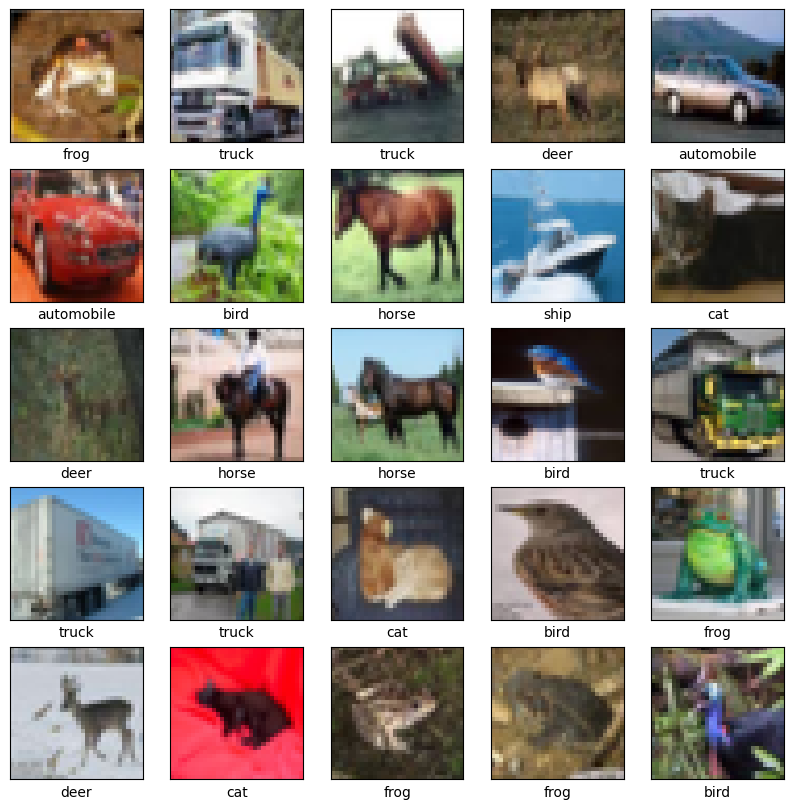

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  #created a convolutional layer with 32 filters of size 3x3, input images as 32x32 pixels with 3 color channels (RGB)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

C:\Users\HUAWEI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Let's display the architecture of your model so far:

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     


 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         


 g2D)                                                            


 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     


Total params: 56320 (220.00 KB)


Trainable params: 56320 (220.00 KB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [14]:
model.add(layers.Flatten())                      #convert the 2D feature maps from the convolutional layers into a 1D array
model.add(layers.Dense(64, activation='relu'))   #Adds a fully connected layer(ann) with 64 neurons and ReLU activation function
model.add(layers.Dense(10))                      #defaults activation is linear activation

Here's the complete architecture of your model:

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     


 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         


 g2D)                                                            


 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     


 flatten (Flatten)           (None, 1024)              0         


 dense (Dense)               (None, 64)                65600     


 dense_1 (Dense)             (None, 10)                650       


Total params: 122570 (478.79 KB)


Trainable params: 122570 (478.79 KB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

 101/1563 [>.............................] - ETA: 5s - loss: 2.1679 - accuracy: 0.1652

 116/1563 [=>............................] - ETA: 5s - loss: 2.1443 - accuracy: 0.1730

 130/1563 [=>............................] - ETA: 5s - loss: 2.1166 - accuracy: 0.1834

 144/1563 [=>............................] - ETA: 5s - loss: 2.1004 - accuracy: 0.1912

 158/1563 [==>...........................] - ETA: 5s - loss: 2.0791 - accuracy: 0.1990

 172/1563 [==>...........................] - ETA: 5s - loss: 2.0618 - accuracy: 0.2062

 187/1563 [==>...........................] - ETA: 5s - loss: 2.0456 - accuracy: 0.2134

 202/1563 [==>...........................] - ETA: 4s - loss: 2.0272 - accuracy: 0.2232

 217/1563 [===>..........................] - ETA: 4s - loss: 2.0088 - accuracy: 0.2321

 231/1563 [===>..........................] - ETA: 4s - loss: 1.9956 - accuracy: 0.2369

 245/1563 [===>..........................] - ETA: 4s - loss: 1.9814 - accuracy: 0.2432

 260/1563 [===>..........................] - ETA: 4s - loss: 1.9725 - accuracy: 0.2463

 274/1563 [====>.........................] - ETA: 4s - loss: 1.9704 - accuracy: 0.2478

 288/1563 [====>.........................] - ETA: 4s - loss: 1.9602 - accuracy: 0.2534

 302/1563 [====>.........................] - ETA: 4s - loss: 1.9493 - accuracy: 0.2589

 317/1563 [=====>........................] - ETA: 4s - loss: 1.9356 - accuracy: 0.2645

 332/1563 [=====>........................] - ETA: 4s - loss: 1.9248 - accuracy: 0.2689

 347/1563 [=====>........................] - ETA: 4s - loss: 1.9125 - accuracy: 0.2742

 362/1563 [=====>........................] - ETA: 4s - loss: 1.8996 - accuracy: 0.2801

 377/1563 [======>.......................] - ETA: 4s - loss: 1.8924 - accuracy: 0.2836

 392/1563 [======>.......................] - ETA: 4s - loss: 1.8809 - accuracy: 0.2894

 407/1563 [======>.......................] - ETA: 4s - loss: 1.8690 - accuracy: 0.2951

 420/1563 [=======>......................] - ETA: 4s - loss: 1.8592 - accuracy: 0.2995

 434/1563 [=======>......................] - ETA: 4s - loss: 1.8560 - accuracy: 0.3017

 448/1563 [=======>......................] - ETA: 4s - loss: 1.8519 - accuracy: 0.3039

 462/1563 [=======>......................] - ETA: 3s - loss: 1.8415 - accuracy: 0.3077

 476/1563 [========>.....................] - ETA: 3s - loss: 1.8346 - accuracy: 0.3114

 490/1563 [========>.....................] - ETA: 3s - loss: 1.8272 - accuracy: 0.3142

 504/1563 [========>.....................] - ETA: 3s - loss: 1.8180 - accuracy: 0.3168

 519/1563 [========>.....................] - ETA: 3s - loss: 1.8140 - accuracy: 0.3189

 534/1563 [=========>....................] - ETA: 3s - loss: 1.8055 - accuracy: 0.3224

 548/1563 [=========>....................] - ETA: 3s - loss: 1.7965 - accuracy: 0.3265

 563/1563 [=========>....................] - ETA: 3s - loss: 1.7891 - accuracy: 0.3296

 577/1563 [==========>...................] - ETA: 3s - loss: 1.7825 - accuracy: 0.3323

 591/1563 [==========>...................] - ETA: 3s - loss: 1.7749 - accuracy: 0.3364

 605/1563 [==========>...................] - ETA: 3s - loss: 1.7672 - accuracy: 0.3394

 619/1563 [==========>...................] - ETA: 3s - loss: 1.7610 - accuracy: 0.3418

 634/1563 [===========>..................] - ETA: 3s - loss: 1.7532 - accuracy: 0.3449

 649/1563 [===========>..................] - ETA: 3s - loss: 1.7478 - accuracy: 0.3473

 664/1563 [===========>..................] - ETA: 3s - loss: 1.7396 - accuracy: 0.3509

 678/1563 [============>.................] - ETA: 3s - loss: 1.7326 - accuracy: 0.3540

 692/1563 [============>.................] - ETA: 3s - loss: 1.7280 - accuracy: 0.3560

 707/1563 [============>.................] - ETA: 3s - loss: 1.7228 - accuracy: 0.3582

 722/1563 [============>.................] - ETA: 3s - loss: 1.7165 - accuracy: 0.3607

 736/1563 [=============>................] - ETA: 2s - loss: 1.7112 - accuracy: 0.3623

 751/1563 [=============>................] - ETA: 2s - loss: 1.7050 - accuracy: 0.3647

 765/1563 [=============>................] - ETA: 2s - loss: 1.7015 - accuracy: 0.3660

 779/1563 [=============>................] - ETA: 2s - loss: 1.6966 - accuracy: 0.3680

 793/1563 [==============>...............] - ETA: 2s - loss: 1.6929 - accuracy: 0.3698

 807/1563 [==============>...............] - ETA: 2s - loss: 1.6882 - accuracy: 0.3719

 821/1563 [==============>...............] - ETA: 2s - loss: 1.6847 - accuracy: 0.3734

 835/1563 [===============>..............] - ETA: 2s - loss: 1.6808 - accuracy: 0.3748

 849/1563 [===============>..............] - ETA: 2s - loss: 1.6757 - accuracy: 0.3769

 863/1563 [===============>..............] - ETA: 2s - loss: 1.6733 - accuracy: 0.3780

 877/1563 [===============>..............] - ETA: 2s - loss: 1.6700 - accuracy: 0.3790

 891/1563 [================>.............] - ETA: 2s - loss: 1.6662 - accuracy: 0.3805

 906/1563 [================>.............] - ETA: 2s - loss: 1.6610 - accuracy: 0.3827

 920/1563 [================>.............] - ETA: 2s - loss: 1.6581 - accuracy: 0.3838

 934/1563 [================>.............] - ETA: 2s - loss: 1.6550 - accuracy: 0.3854

 949/1563 [=================>............] - ETA: 2s - loss: 1.6504 - accuracy: 0.3873

 963/1563 [=================>............] - ETA: 2s - loss: 1.6468 - accuracy: 0.3888

 977/1563 [=================>............] - ETA: 2s - loss: 1.6425 - accuracy: 0.3904

 991/1563 [==================>...........] - ETA: 2s - loss: 1.6375 - accuracy: 0.3926

1006/1563 [==================>...........] - ETA: 2s - loss: 1.6331 - accuracy: 0.3945

1020/1563 [==================>...........] - ETA: 1s - loss: 1.6305 - accuracy: 0.3955

1034/1563 [==================>...........] - ETA: 1s - loss: 1.6277 - accuracy: 0.3967

1048/1563 [===================>..........] - ETA: 1s - loss: 1.6246 - accuracy: 0.3981

1062/1563 [===================>..........] - ETA: 1s - loss: 1.6210 - accuracy: 0.4000

1076/1563 [===================>..........] - ETA: 1s - loss: 1.6181 - accuracy: 0.4011

1091/1563 [===================>..........] - ETA: 1s - loss: 1.6158 - accuracy: 0.4022

1105/1563 [====================>.........] - ETA: 1s - loss: 1.6128 - accuracy: 0.4035

1120/1563 [====================>.........] - ETA: 1s - loss: 1.6087 - accuracy: 0.4051

1134/1563 [====================>.........] - ETA: 1s - loss: 1.6047 - accuracy: 0.4070

1148/1563 [=====================>........] - ETA: 1s - loss: 1.6020 - accuracy: 0.4083

1162/1563 [=====================>........] - ETA: 1s - loss: 1.5984 - accuracy: 0.4100

1176/1563 [=====================>........] - ETA: 1s - loss: 1.5962 - accuracy: 0.4110

1190/1563 [=====================>........] - ETA: 1s - loss: 1.5929 - accuracy: 0.4126

1204/1563 [======================>.......] - ETA: 1s - loss: 1.5893 - accuracy: 0.4134

1218/1563 [======================>.......] - ETA: 1s - loss: 1.5842 - accuracy: 0.4154

1232/1563 [======================>.......] - ETA: 1s - loss: 1.5814 - accuracy: 0.4164

1247/1563 [======================>.......] - ETA: 1s - loss: 1.5786 - accuracy: 0.4178

1262/1563 [=======================>......] - ETA: 1s - loss: 1.5768 - accuracy: 0.4188

1277/1563 [=======================>......] - ETA: 1s - loss: 1.5741 - accuracy: 0.4201

1291/1563 [=======================>......] - ETA: 0s - loss: 1.5724 - accuracy: 0.4210

1306/1563 [========================>.....] - ETA: 0s - loss: 1.5687 - accuracy: 0.4224

1321/1563 [========================>.....] - ETA: 0s - loss: 1.5653 - accuracy: 0.4240

1335/1563 [========================>.....] - ETA: 0s - loss: 1.5630 - accuracy: 0.4249

1349/1563 [========================>.....] - ETA: 0s - loss: 1.5607 - accuracy: 0.4261

1363/1563 [=========================>....] - ETA: 0s - loss: 1.5580 - accuracy: 0.4272

1377/1563 [=========================>....] - ETA: 0s - loss: 1.5550 - accuracy: 0.4284

1392/1563 [=========================>....] - ETA: 0s - loss: 1.5518 - accuracy: 0.4297

1406/1563 [=========================>....] - ETA: 0s - loss: 1.5498 - accuracy: 0.4307

1420/1563 [==========================>...] - ETA: 0s - loss: 1.5462 - accuracy: 0.4321

1434/1563 [==========================>...] - ETA: 0s - loss: 1.5436 - accuracy: 0.4334

1449/1563 [==========================>...] - ETA: 0s - loss: 1.5401 - accuracy: 0.4347

1463/1563 [===========================>..] - ETA: 0s - loss: 1.5376 - accuracy: 0.4354

1477/1563 [===========================>..] - ETA: 0s - loss: 1.5350 - accuracy: 0.4366

1491/1563 [===========================>..] - ETA: 0s - loss: 1.5332 - accuracy: 0.4374

1506/1563 [===========================>..] - ETA: 0s - loss: 1.5303 - accuracy: 0.4388

1520/1563 [============================>.] - ETA: 0s - loss: 1.5278 - accuracy: 0.4401

1535/1563 [============================>.] - ETA: 0s - loss: 1.5258 - accuracy: 0.4411

1549/1563 [============================>.] - ETA: 0s - loss: 1.5235 - accuracy: 0.4419

1563/1563 [==============================] - ETA: 0s - loss: 1.5211 - accuracy: 0.4429

1563/1563 [==============================] - 10s 5ms/step - loss: 1.5211 - accuracy: 0.4429 - val_loss: 1.2497 - val_accuracy: 0.5531


Epoch 2/10


   1/1563 [..............................] - ETA: 7s - loss: 1.2460 - accuracy: 0.5938

  15/1563 [..............................] - ETA: 5s - loss: 1.2649 - accuracy: 0.5542

  29/1563 [..............................] - ETA: 5s - loss: 1.2555 - accuracy: 0.5603

  43/1563 [..............................] - ETA: 5s - loss: 1.2564 - accuracy: 0.5494

  57/1563 [>.............................] - ETA: 5s - loss: 1.2528 - accuracy: 0.5543

  71/1563 [>.............................] - ETA: 5s - loss: 1.2338 - accuracy: 0.5603

  85/1563 [>.............................] - ETA: 5s - loss: 1.2492 - accuracy: 0.5526

  99/1563 [>.............................] - ETA: 5s - loss: 1.2446 - accuracy: 0.5496

 113/1563 [=>............................] - ETA: 5s - loss: 1.2265 - accuracy: 0.5581

 127/1563 [=>............................] - ETA: 5s - loss: 1.2359 - accuracy: 0.5561

 141/1563 [=>............................] - ETA: 5s - loss: 1.2319 - accuracy: 0.5578

 155/1563 [=>............................] - ETA: 5s - loss: 1.2290 - accuracy: 0.5591

 169/1563 [==>...........................] - ETA: 5s - loss: 1.2213 - accuracy: 0.5632

 183/1563 [==>...........................] - ETA: 5s - loss: 1.2206 - accuracy: 0.5647

 197/1563 [==>...........................] - ETA: 5s - loss: 1.2187 - accuracy: 0.5635

 211/1563 [===>..........................] - ETA: 5s - loss: 1.2173 - accuracy: 0.5649

 225/1563 [===>..........................] - ETA: 4s - loss: 1.2180 - accuracy: 0.5656

 239/1563 [===>..........................] - ETA: 4s - loss: 1.2171 - accuracy: 0.5656

 253/1563 [===>..........................] - ETA: 4s - loss: 1.2169 - accuracy: 0.5665

 267/1563 [====>.........................] - ETA: 4s - loss: 1.2165 - accuracy: 0.5668

 281/1563 [====>.........................] - ETA: 4s - loss: 1.2169 - accuracy: 0.5675

 295/1563 [====>.........................] - ETA: 4s - loss: 1.2158 - accuracy: 0.5675

 309/1563 [====>.........................] - ETA: 4s - loss: 1.2165 - accuracy: 0.5671

 323/1563 [=====>........................] - ETA: 4s - loss: 1.2145 - accuracy: 0.5680

 337/1563 [=====>........................] - ETA: 4s - loss: 1.2137 - accuracy: 0.5688

 351/1563 [=====>........................] - ETA: 4s - loss: 1.2107 - accuracy: 0.5689

 365/1563 [======>.......................] - ETA: 4s - loss: 1.2066 - accuracy: 0.5711

 379/1563 [======>.......................] - ETA: 4s - loss: 1.2097 - accuracy: 0.5693

 393/1563 [======>.......................] - ETA: 4s - loss: 1.2073 - accuracy: 0.5703

 407/1563 [======>.......................] - ETA: 4s - loss: 1.2039 - accuracy: 0.5718

 421/1563 [=======>......................] - ETA: 4s - loss: 1.2028 - accuracy: 0.5731

 435/1563 [=======>......................] - ETA: 4s - loss: 1.1987 - accuracy: 0.5748

 449/1563 [=======>......................] - ETA: 4s - loss: 1.1981 - accuracy: 0.5754

 463/1563 [=======>......................] - ETA: 4s - loss: 1.1987 - accuracy: 0.5756

 477/1563 [========>.....................] - ETA: 4s - loss: 1.1942 - accuracy: 0.5776

 490/1563 [========>.....................] - ETA: 3s - loss: 1.1917 - accuracy: 0.5779

 504/1563 [========>.....................] - ETA: 3s - loss: 1.1912 - accuracy: 0.5776

 518/1563 [========>.....................] - ETA: 3s - loss: 1.1913 - accuracy: 0.5779

 532/1563 [=========>....................] - ETA: 3s - loss: 1.1887 - accuracy: 0.5789

 546/1563 [=========>....................] - ETA: 3s - loss: 1.1883 - accuracy: 0.5794

 560/1563 [=========>....................] - ETA: 3s - loss: 1.1865 - accuracy: 0.5799

 574/1563 [==========>...................] - ETA: 3s - loss: 1.1866 - accuracy: 0.5793

 588/1563 [==========>...................] - ETA: 3s - loss: 1.1850 - accuracy: 0.5796

 602/1563 [==========>...................] - ETA: 3s - loss: 1.1819 - accuracy: 0.5811

 616/1563 [==========>...................] - ETA: 3s - loss: 1.1817 - accuracy: 0.5813

 630/1563 [===========>..................] - ETA: 3s - loss: 1.1810 - accuracy: 0.5814

 644/1563 [===========>..................] - ETA: 3s - loss: 1.1811 - accuracy: 0.5815

 658/1563 [===========>..................] - ETA: 3s - loss: 1.1831 - accuracy: 0.5806

 672/1563 [===========>..................] - ETA: 3s - loss: 1.1825 - accuracy: 0.5808

 686/1563 [============>.................] - ETA: 3s - loss: 1.1816 - accuracy: 0.5819

 700/1563 [============>.................] - ETA: 3s - loss: 1.1816 - accuracy: 0.5816

 714/1563 [============>.................] - ETA: 3s - loss: 1.1820 - accuracy: 0.5809

 728/1563 [============>.................] - ETA: 3s - loss: 1.1804 - accuracy: 0.5816

 742/1563 [=============>................] - ETA: 3s - loss: 1.1802 - accuracy: 0.5824

 755/1563 [=============>................] - ETA: 3s - loss: 1.1802 - accuracy: 0.5825

 769/1563 [=============>................] - ETA: 2s - loss: 1.1794 - accuracy: 0.5829

 783/1563 [==============>...............] - ETA: 2s - loss: 1.1793 - accuracy: 0.5829

 797/1563 [==============>...............] - ETA: 2s - loss: 1.1782 - accuracy: 0.5836

 811/1563 [==============>...............] - ETA: 2s - loss: 1.1764 - accuracy: 0.5840

 825/1563 [==============>...............] - ETA: 2s - loss: 1.1755 - accuracy: 0.5850

 839/1563 [===============>..............] - ETA: 2s - loss: 1.1774 - accuracy: 0.5844

 853/1563 [===============>..............] - ETA: 2s - loss: 1.1759 - accuracy: 0.5849

 867/1563 [===============>..............] - ETA: 2s - loss: 1.1753 - accuracy: 0.5851

 881/1563 [===============>..............] - ETA: 2s - loss: 1.1736 - accuracy: 0.5858

 895/1563 [================>.............] - ETA: 2s - loss: 1.1737 - accuracy: 0.5860

 909/1563 [================>.............] - ETA: 2s - loss: 1.1740 - accuracy: 0.5851

 923/1563 [================>.............] - ETA: 2s - loss: 1.1730 - accuracy: 0.5853

 936/1563 [================>.............] - ETA: 2s - loss: 1.1717 - accuracy: 0.5857

 950/1563 [=================>............] - ETA: 2s - loss: 1.1715 - accuracy: 0.5860

 964/1563 [=================>............] - ETA: 2s - loss: 1.1710 - accuracy: 0.5864

 978/1563 [=================>............] - ETA: 2s - loss: 1.1692 - accuracy: 0.5868

 992/1563 [==================>...........] - ETA: 2s - loss: 1.1689 - accuracy: 0.5869

1006/1563 [==================>...........] - ETA: 2s - loss: 1.1680 - accuracy: 0.5872

1020/1563 [==================>...........] - ETA: 2s - loss: 1.1675 - accuracy: 0.5873

1034/1563 [==================>...........] - ETA: 1s - loss: 1.1668 - accuracy: 0.5878

1048/1563 [===================>..........] - ETA: 1s - loss: 1.1650 - accuracy: 0.5882

1062/1563 [===================>..........] - ETA: 1s - loss: 1.1641 - accuracy: 0.5886

1076/1563 [===================>..........] - ETA: 1s - loss: 1.1637 - accuracy: 0.5889

1090/1563 [===================>..........] - ETA: 1s - loss: 1.1633 - accuracy: 0.5888

1104/1563 [====================>.........] - ETA: 1s - loss: 1.1630 - accuracy: 0.5892

1118/1563 [====================>.........] - ETA: 1s - loss: 1.1634 - accuracy: 0.5892

1132/1563 [====================>.........] - ETA: 1s - loss: 1.1632 - accuracy: 0.5895

1146/1563 [====================>.........] - ETA: 1s - loss: 1.1622 - accuracy: 0.5897

1160/1563 [=====================>........] - ETA: 1s - loss: 1.1613 - accuracy: 0.5899

1174/1563 [=====================>........] - ETA: 1s - loss: 1.1599 - accuracy: 0.5906

1188/1563 [=====================>........] - ETA: 1s - loss: 1.1596 - accuracy: 0.5908

1202/1563 [======================>.......] - ETA: 1s - loss: 1.1591 - accuracy: 0.5907

1216/1563 [======================>.......] - ETA: 1s - loss: 1.1590 - accuracy: 0.5906

1230/1563 [======================>.......] - ETA: 1s - loss: 1.1586 - accuracy: 0.5911

1244/1563 [======================>.......] - ETA: 1s - loss: 1.1568 - accuracy: 0.5919

1257/1563 [=======================>......] - ETA: 1s - loss: 1.1552 - accuracy: 0.5925

1270/1563 [=======================>......] - ETA: 1s - loss: 1.1540 - accuracy: 0.5929

1283/1563 [=======================>......] - ETA: 1s - loss: 1.1538 - accuracy: 0.5928

1297/1563 [=======================>......] - ETA: 0s - loss: 1.1532 - accuracy: 0.5931

1311/1563 [========================>.....] - ETA: 0s - loss: 1.1529 - accuracy: 0.5936

1325/1563 [========================>.....] - ETA: 0s - loss: 1.1521 - accuracy: 0.5938

1339/1563 [========================>.....] - ETA: 0s - loss: 1.1512 - accuracy: 0.5941

1353/1563 [========================>.....] - ETA: 0s - loss: 1.1502 - accuracy: 0.5942

1367/1563 [=========================>....] - ETA: 0s - loss: 1.1488 - accuracy: 0.5946

1381/1563 [=========================>....] - ETA: 0s - loss: 1.1482 - accuracy: 0.5952

1394/1563 [=========================>....] - ETA: 0s - loss: 1.1483 - accuracy: 0.5952

1408/1563 [==========================>...] - ETA: 0s - loss: 1.1476 - accuracy: 0.5953

1422/1563 [==========================>...] - ETA: 0s - loss: 1.1474 - accuracy: 0.5953

1436/1563 [==========================>...] - ETA: 0s - loss: 1.1469 - accuracy: 0.5957

1450/1563 [==========================>...] - ETA: 0s - loss: 1.1464 - accuracy: 0.5959

1464/1563 [===========================>..] - ETA: 0s - loss: 1.1449 - accuracy: 0.5965

1478/1563 [===========================>..] - ETA: 0s - loss: 1.1439 - accuracy: 0.5967

1492/1563 [===========================>..] - ETA: 0s - loss: 1.1432 - accuracy: 0.5970

1506/1563 [===========================>..] - ETA: 0s - loss: 1.1430 - accuracy: 0.5970

1519/1563 [============================>.] - ETA: 0s - loss: 1.1424 - accuracy: 0.5971

1532/1563 [============================>.] - ETA: 0s - loss: 1.1420 - accuracy: 0.5970

1546/1563 [============================>.] - ETA: 0s - loss: 1.1414 - accuracy: 0.5973

1559/1563 [============================>.] - ETA: 0s - loss: 1.1410 - accuracy: 0.5972

1563/1563 [==============================] - 6s 4ms/step - loss: 1.1408 - accuracy: 0.5974 - val_loss: 1.1474 - val_accuracy: 0.6023


Epoch 3/10


   1/1563 [..............................] - ETA: 8s - loss: 0.7787 - accuracy: 0.7500

  15/1563 [..............................] - ETA: 5s - loss: 1.1263 - accuracy: 0.6000

  29/1563 [..............................] - ETA: 5s - loss: 1.0451 - accuracy: 0.6325

  43/1563 [..............................] - ETA: 5s - loss: 1.0452 - accuracy: 0.6294

  57/1563 [>.............................] - ETA: 5s - loss: 1.0284 - accuracy: 0.6349

  71/1563 [>.............................] - ETA: 5s - loss: 1.0226 - accuracy: 0.6356

  85/1563 [>.............................] - ETA: 5s - loss: 1.0247 - accuracy: 0.6346

  99/1563 [>.............................] - ETA: 5s - loss: 1.0350 - accuracy: 0.6291

 113/1563 [=>............................] - ETA: 5s - loss: 1.0388 - accuracy: 0.6286

 127/1563 [=>............................] - ETA: 5s - loss: 1.0321 - accuracy: 0.6314

 141/1563 [=>............................] - ETA: 5s - loss: 1.0369 - accuracy: 0.6312

 155/1563 [=>............................] - ETA: 5s - loss: 1.0322 - accuracy: 0.6357

 169/1563 [==>...........................] - ETA: 5s - loss: 1.0338 - accuracy: 0.6359

 183/1563 [==>...........................] - ETA: 5s - loss: 1.0305 - accuracy: 0.6375

 197/1563 [==>...........................] - ETA: 5s - loss: 1.0231 - accuracy: 0.6404

 211/1563 [===>..........................] - ETA: 4s - loss: 1.0161 - accuracy: 0.6429

 225/1563 [===>..........................] - ETA: 4s - loss: 1.0122 - accuracy: 0.6446

 239/1563 [===>..........................] - ETA: 4s - loss: 1.0109 - accuracy: 0.6451

 253/1563 [===>..........................] - ETA: 4s - loss: 1.0160 - accuracy: 0.6419

 267/1563 [====>.........................] - ETA: 4s - loss: 1.0148 - accuracy: 0.6422

 281/1563 [====>.........................] - ETA: 4s - loss: 1.0173 - accuracy: 0.6421

 295/1563 [====>.........................] - ETA: 4s - loss: 1.0176 - accuracy: 0.6415

 309/1563 [====>.........................] - ETA: 4s - loss: 1.0168 - accuracy: 0.6418

 323/1563 [=====>........................] - ETA: 4s - loss: 1.0124 - accuracy: 0.6435

 337/1563 [=====>........................] - ETA: 4s - loss: 1.0126 - accuracy: 0.6443

 351/1563 [=====>........................] - ETA: 4s - loss: 1.0169 - accuracy: 0.6423

 365/1563 [======>.......................] - ETA: 4s - loss: 1.0149 - accuracy: 0.6438

 379/1563 [======>.......................] - ETA: 4s - loss: 1.0142 - accuracy: 0.6434

 393/1563 [======>.......................] - ETA: 4s - loss: 1.0181 - accuracy: 0.6428

 407/1563 [======>.......................] - ETA: 4s - loss: 1.0179 - accuracy: 0.6424

 421/1563 [=======>......................] - ETA: 4s - loss: 1.0169 - accuracy: 0.6430

 435/1563 [=======>......................] - ETA: 4s - loss: 1.0176 - accuracy: 0.6426

 449/1563 [=======>......................] - ETA: 4s - loss: 1.0152 - accuracy: 0.6436

 463/1563 [=======>......................] - ETA: 4s - loss: 1.0155 - accuracy: 0.6425

 477/1563 [========>.....................] - ETA: 4s - loss: 1.0146 - accuracy: 0.6426

 491/1563 [========>.....................] - ETA: 3s - loss: 1.0119 - accuracy: 0.6431

 505/1563 [========>.....................] - ETA: 3s - loss: 1.0115 - accuracy: 0.6431

 519/1563 [========>.....................] - ETA: 3s - loss: 1.0130 - accuracy: 0.6428

 533/1563 [=========>....................] - ETA: 3s - loss: 1.0131 - accuracy: 0.6427

 547/1563 [=========>....................] - ETA: 3s - loss: 1.0154 - accuracy: 0.6419

 561/1563 [=========>....................] - ETA: 3s - loss: 1.0158 - accuracy: 0.6415

 574/1563 [==========>...................] - ETA: 3s - loss: 1.0153 - accuracy: 0.6416

 588/1563 [==========>...................] - ETA: 3s - loss: 1.0139 - accuracy: 0.6423

 602/1563 [==========>...................] - ETA: 3s - loss: 1.0128 - accuracy: 0.6427

 616/1563 [==========>...................] - ETA: 3s - loss: 1.0118 - accuracy: 0.6432

 629/1563 [===========>..................] - ETA: 3s - loss: 1.0089 - accuracy: 0.6444

 642/1563 [===========>..................] - ETA: 3s - loss: 1.0071 - accuracy: 0.6445

 656/1563 [===========>..................] - ETA: 3s - loss: 1.0055 - accuracy: 0.6453

 670/1563 [===========>..................] - ETA: 3s - loss: 1.0049 - accuracy: 0.6457

 684/1563 [============>.................] - ETA: 3s - loss: 1.0038 - accuracy: 0.6464

 698/1563 [============>.................] - ETA: 3s - loss: 1.0030 - accuracy: 0.6470

 712/1563 [============>.................] - ETA: 3s - loss: 1.0034 - accuracy: 0.6470

 726/1563 [============>.................] - ETA: 3s - loss: 1.0027 - accuracy: 0.6473

 740/1563 [=============>................] - ETA: 3s - loss: 1.0017 - accuracy: 0.6480

 754/1563 [=============>................] - ETA: 3s - loss: 1.0005 - accuracy: 0.6485

 768/1563 [=============>................] - ETA: 2s - loss: 1.0004 - accuracy: 0.6484

 782/1563 [==============>...............] - ETA: 2s - loss: 1.0008 - accuracy: 0.6484

 796/1563 [==============>...............] - ETA: 2s - loss: 1.0017 - accuracy: 0.6478

 810/1563 [==============>...............] - ETA: 2s - loss: 1.0010 - accuracy: 0.6479

 824/1563 [==============>...............] - ETA: 2s - loss: 1.0012 - accuracy: 0.6478

 838/1563 [===============>..............] - ETA: 2s - loss: 1.0007 - accuracy: 0.6483

 852/1563 [===============>..............] - ETA: 2s - loss: 0.9994 - accuracy: 0.6487

 866/1563 [===============>..............] - ETA: 2s - loss: 0.9985 - accuracy: 0.6490

 880/1563 [===============>..............] - ETA: 2s - loss: 0.9987 - accuracy: 0.6489

 894/1563 [================>.............] - ETA: 2s - loss: 0.9985 - accuracy: 0.6489

 908/1563 [================>.............] - ETA: 2s - loss: 0.9978 - accuracy: 0.6496

 922/1563 [================>.............] - ETA: 2s - loss: 0.9974 - accuracy: 0.6499

 935/1563 [================>.............] - ETA: 2s - loss: 0.9974 - accuracy: 0.6501

 948/1563 [=================>............] - ETA: 2s - loss: 0.9963 - accuracy: 0.6507

 961/1563 [=================>............] - ETA: 2s - loss: 0.9970 - accuracy: 0.6506

 974/1563 [=================>............] - ETA: 2s - loss: 0.9964 - accuracy: 0.6509

 987/1563 [=================>............] - ETA: 2s - loss: 0.9962 - accuracy: 0.6510

1000/1563 [==================>...........] - ETA: 2s - loss: 0.9949 - accuracy: 0.6514

1014/1563 [==================>...........] - ETA: 2s - loss: 0.9943 - accuracy: 0.6518

1028/1563 [==================>...........] - ETA: 2s - loss: 0.9928 - accuracy: 0.6524

1042/1563 [===================>..........] - ETA: 1s - loss: 0.9917 - accuracy: 0.6524

1056/1563 [===================>..........] - ETA: 1s - loss: 0.9917 - accuracy: 0.6524

1070/1563 [===================>..........] - ETA: 1s - loss: 0.9918 - accuracy: 0.6524

1084/1563 [===================>..........] - ETA: 1s - loss: 0.9929 - accuracy: 0.6516

1098/1563 [====================>.........] - ETA: 1s - loss: 0.9922 - accuracy: 0.6518

1112/1563 [====================>.........] - ETA: 1s - loss: 0.9922 - accuracy: 0.6517

1126/1563 [====================>.........] - ETA: 1s - loss: 0.9911 - accuracy: 0.6518

1140/1563 [====================>.........] - ETA: 1s - loss: 0.9913 - accuracy: 0.6517

1154/1563 [=====================>........] - ETA: 1s - loss: 0.9919 - accuracy: 0.6516

1168/1563 [=====================>........] - ETA: 1s - loss: 0.9924 - accuracy: 0.6518

1182/1563 [=====================>........] - ETA: 1s - loss: 0.9923 - accuracy: 0.6515

1196/1563 [=====================>........] - ETA: 1s - loss: 0.9915 - accuracy: 0.6516

1210/1563 [======================>.......] - ETA: 1s - loss: 0.9909 - accuracy: 0.6516

1224/1563 [======================>.......] - ETA: 1s - loss: 0.9906 - accuracy: 0.6521

1237/1563 [======================>.......] - ETA: 1s - loss: 0.9908 - accuracy: 0.6522

1250/1563 [======================>.......] - ETA: 1s - loss: 0.9912 - accuracy: 0.6520

1264/1563 [=======================>......] - ETA: 1s - loss: 0.9908 - accuracy: 0.6520

1277/1563 [=======================>......] - ETA: 1s - loss: 0.9905 - accuracy: 0.6520

1291/1563 [=======================>......] - ETA: 1s - loss: 0.9896 - accuracy: 0.6523

1305/1563 [========================>.....] - ETA: 0s - loss: 0.9896 - accuracy: 0.6524

1319/1563 [========================>.....] - ETA: 0s - loss: 0.9906 - accuracy: 0.6522

1333/1563 [========================>.....] - ETA: 0s - loss: 0.9908 - accuracy: 0.6520

1347/1563 [========================>.....] - ETA: 0s - loss: 0.9900 - accuracy: 0.6521

1361/1563 [=========================>....] - ETA: 0s - loss: 0.9897 - accuracy: 0.6524

1375/1563 [=========================>....] - ETA: 0s - loss: 0.9894 - accuracy: 0.6524

1389/1563 [=========================>....] - ETA: 0s - loss: 0.9895 - accuracy: 0.6524

1403/1563 [=========================>....] - ETA: 0s - loss: 0.9896 - accuracy: 0.6523

1417/1563 [==========================>...] - ETA: 0s - loss: 0.9887 - accuracy: 0.6527

1431/1563 [==========================>...] - ETA: 0s - loss: 0.9879 - accuracy: 0.6532

1445/1563 [==========================>...] - ETA: 0s - loss: 0.9880 - accuracy: 0.6531

1459/1563 [===========================>..] - ETA: 0s - loss: 0.9876 - accuracy: 0.6531

1473/1563 [===========================>..] - ETA: 0s - loss: 0.9867 - accuracy: 0.6537

1487/1563 [===========================>..] - ETA: 0s - loss: 0.9866 - accuracy: 0.6536

1501/1563 [===========================>..] - ETA: 0s - loss: 0.9862 - accuracy: 0.6539

1515/1563 [============================>.] - ETA: 0s - loss: 0.9864 - accuracy: 0.6536

1529/1563 [============================>.] - ETA: 0s - loss: 0.9864 - accuracy: 0.6538

1543/1563 [============================>.] - ETA: 0s - loss: 0.9861 - accuracy: 0.6538

1557/1563 [============================>.] - ETA: 0s - loss: 0.9857 - accuracy: 0.6539

1563/1563 [==============================] - 6s 4ms/step - loss: 0.9862 - accuracy: 0.6538 - val_loss: 0.9759 - val_accuracy: 0.6582


Epoch 4/10


   1/1563 [..............................] - ETA: 7s - loss: 0.7409 - accuracy: 0.7500

  15/1563 [..............................] - ETA: 5s - loss: 0.8341 - accuracy: 0.7146

  29/1563 [..............................] - ETA: 5s - loss: 0.8896 - accuracy: 0.6961

  43/1563 [..............................] - ETA: 5s - loss: 0.9069 - accuracy: 0.6882

  57/1563 [>.............................] - ETA: 5s - loss: 0.9088 - accuracy: 0.6875

  71/1563 [>.............................] - ETA: 5s - loss: 0.9178 - accuracy: 0.6835

  85/1563 [>.............................] - ETA: 5s - loss: 0.9269 - accuracy: 0.6805

  99/1563 [>.............................] - ETA: 5s - loss: 0.9237 - accuracy: 0.6821

 113/1563 [=>............................] - ETA: 5s - loss: 0.9181 - accuracy: 0.6836

 127/1563 [=>............................] - ETA: 5s - loss: 0.9118 - accuracy: 0.6841

 141/1563 [=>............................] - ETA: 5s - loss: 0.9130 - accuracy: 0.6835

 155/1563 [=>............................] - ETA: 5s - loss: 0.9188 - accuracy: 0.6817

 169/1563 [==>...........................] - ETA: 5s - loss: 0.9126 - accuracy: 0.6825

 183/1563 [==>...........................] - ETA: 5s - loss: 0.9089 - accuracy: 0.6839

 197/1563 [==>...........................] - ETA: 5s - loss: 0.9136 - accuracy: 0.6850

 211/1563 [===>..........................] - ETA: 5s - loss: 0.9166 - accuracy: 0.6832

 224/1563 [===>..........................] - ETA: 4s - loss: 0.9107 - accuracy: 0.6847

 237/1563 [===>..........................] - ETA: 4s - loss: 0.9054 - accuracy: 0.6864

 250/1563 [===>..........................] - ETA: 4s - loss: 0.9020 - accuracy: 0.6876

 264/1563 [====>.........................] - ETA: 4s - loss: 0.9032 - accuracy: 0.6875

 278/1563 [====>.........................] - ETA: 4s - loss: 0.9031 - accuracy: 0.6876

 292/1563 [====>.........................] - ETA: 4s - loss: 0.9100 - accuracy: 0.6845

 306/1563 [====>.........................] - ETA: 4s - loss: 0.9057 - accuracy: 0.6858

 320/1563 [=====>........................] - ETA: 4s - loss: 0.9073 - accuracy: 0.6863

 334/1563 [=====>........................] - ETA: 4s - loss: 0.9093 - accuracy: 0.6857

 348/1563 [=====>........................] - ETA: 4s - loss: 0.9071 - accuracy: 0.6872

 362/1563 [=====>........................] - ETA: 4s - loss: 0.9060 - accuracy: 0.6875

 376/1563 [======>.......................] - ETA: 4s - loss: 0.9047 - accuracy: 0.6874

 390/1563 [======>.......................] - ETA: 4s - loss: 0.9040 - accuracy: 0.6876

 404/1563 [======>.......................] - ETA: 4s - loss: 0.9044 - accuracy: 0.6873

 418/1563 [=======>......................] - ETA: 4s - loss: 0.9028 - accuracy: 0.6871

 432/1563 [=======>......................] - ETA: 4s - loss: 0.8995 - accuracy: 0.6882

 446/1563 [=======>......................] - ETA: 4s - loss: 0.8988 - accuracy: 0.6874

 460/1563 [=======>......................] - ETA: 4s - loss: 0.9006 - accuracy: 0.6859

 474/1563 [========>.....................] - ETA: 4s - loss: 0.9005 - accuracy: 0.6859

 488/1563 [========>.....................] - ETA: 4s - loss: 0.9020 - accuracy: 0.6850

 502/1563 [========>.....................] - ETA: 3s - loss: 0.9043 - accuracy: 0.6844

 516/1563 [========>.....................] - ETA: 3s - loss: 0.9071 - accuracy: 0.6839

 530/1563 [=========>....................] - ETA: 3s - loss: 0.9065 - accuracy: 0.6835

 544/1563 [=========>....................] - ETA: 3s - loss: 0.9073 - accuracy: 0.6839

 558/1563 [=========>....................] - ETA: 3s - loss: 0.9053 - accuracy: 0.6849

 573/1563 [=========>....................] - ETA: 3s - loss: 0.9048 - accuracy: 0.6852

 587/1563 [==========>...................] - ETA: 3s - loss: 0.9028 - accuracy: 0.6849

 601/1563 [==========>...................] - ETA: 3s - loss: 0.9002 - accuracy: 0.6860

 615/1563 [==========>...................] - ETA: 3s - loss: 0.8989 - accuracy: 0.6859

 628/1563 [===========>..................] - ETA: 3s - loss: 0.8994 - accuracy: 0.6859

 641/1563 [===========>..................] - ETA: 3s - loss: 0.8992 - accuracy: 0.6858

 654/1563 [===========>..................] - ETA: 3s - loss: 0.8980 - accuracy: 0.6861

 667/1563 [===========>..................] - ETA: 3s - loss: 0.9005 - accuracy: 0.6849

 681/1563 [============>.................] - ETA: 3s - loss: 0.8996 - accuracy: 0.6853

 694/1563 [============>.................] - ETA: 3s - loss: 0.9002 - accuracy: 0.6848

 708/1563 [============>.................] - ETA: 3s - loss: 0.9003 - accuracy: 0.6849

 722/1563 [============>.................] - ETA: 3s - loss: 0.9001 - accuracy: 0.6848

 736/1563 [=============>................] - ETA: 3s - loss: 0.9009 - accuracy: 0.6844

 750/1563 [=============>................] - ETA: 3s - loss: 0.9005 - accuracy: 0.6840

 764/1563 [=============>................] - ETA: 2s - loss: 0.9008 - accuracy: 0.6842

 778/1563 [=============>................] - ETA: 2s - loss: 0.9012 - accuracy: 0.6838

 792/1563 [==============>...............] - ETA: 2s - loss: 0.9007 - accuracy: 0.6840

 806/1563 [==============>...............] - ETA: 2s - loss: 0.8999 - accuracy: 0.6847

 821/1563 [==============>...............] - ETA: 2s - loss: 0.9003 - accuracy: 0.6842

 835/1563 [===============>..............] - ETA: 2s - loss: 0.9002 - accuracy: 0.6842

 849/1563 [===============>..............] - ETA: 2s - loss: 0.9006 - accuracy: 0.6839

 863/1563 [===============>..............] - ETA: 2s - loss: 0.9016 - accuracy: 0.6833

 877/1563 [===============>..............] - ETA: 2s - loss: 0.9015 - accuracy: 0.6836

 891/1563 [================>.............] - ETA: 2s - loss: 0.9016 - accuracy: 0.6838

 905/1563 [================>.............] - ETA: 2s - loss: 0.9019 - accuracy: 0.6836

 919/1563 [================>.............] - ETA: 2s - loss: 0.9002 - accuracy: 0.6845

 933/1563 [================>.............] - ETA: 2s - loss: 0.9005 - accuracy: 0.6844

 947/1563 [=================>............] - ETA: 2s - loss: 0.8998 - accuracy: 0.6849

 961/1563 [=================>............] - ETA: 2s - loss: 0.8998 - accuracy: 0.6849

 975/1563 [=================>............] - ETA: 2s - loss: 0.9006 - accuracy: 0.6846

 989/1563 [=================>............] - ETA: 2s - loss: 0.9010 - accuracy: 0.6845

1004/1563 [==================>...........] - ETA: 2s - loss: 0.9014 - accuracy: 0.6843

1018/1563 [==================>...........] - ETA: 2s - loss: 0.9013 - accuracy: 0.6845

1032/1563 [==================>...........] - ETA: 1s - loss: 0.9000 - accuracy: 0.6853

1046/1563 [===================>..........] - ETA: 1s - loss: 0.9009 - accuracy: 0.6848

1061/1563 [===================>..........] - ETA: 1s - loss: 0.9010 - accuracy: 0.6847

1075/1563 [===================>..........] - ETA: 1s - loss: 0.9011 - accuracy: 0.6844

1089/1563 [===================>..........] - ETA: 1s - loss: 0.9007 - accuracy: 0.6845

1103/1563 [====================>.........] - ETA: 1s - loss: 0.9001 - accuracy: 0.6847

1117/1563 [====================>.........] - ETA: 1s - loss: 0.8992 - accuracy: 0.6853

1131/1563 [====================>.........] - ETA: 1s - loss: 0.8997 - accuracy: 0.6852

1146/1563 [====================>.........] - ETA: 1s - loss: 0.8999 - accuracy: 0.6851

1161/1563 [=====================>........] - ETA: 1s - loss: 0.9001 - accuracy: 0.6849

1175/1563 [=====================>........] - ETA: 1s - loss: 0.8999 - accuracy: 0.6848

1189/1563 [=====================>........] - ETA: 1s - loss: 0.8988 - accuracy: 0.6854

1203/1563 [======================>.......] - ETA: 1s - loss: 0.8985 - accuracy: 0.6858

1217/1563 [======================>.......] - ETA: 1s - loss: 0.8985 - accuracy: 0.6859

1232/1563 [======================>.......] - ETA: 1s - loss: 0.8974 - accuracy: 0.6863

1246/1563 [======================>.......] - ETA: 1s - loss: 0.8967 - accuracy: 0.6863

1261/1563 [=======================>......] - ETA: 1s - loss: 0.8954 - accuracy: 0.6869

1275/1563 [=======================>......] - ETA: 1s - loss: 0.8946 - accuracy: 0.6870

1289/1563 [=======================>......] - ETA: 1s - loss: 0.8943 - accuracy: 0.6868

1303/1563 [========================>.....] - ETA: 0s - loss: 0.8945 - accuracy: 0.6866

1317/1563 [========================>.....] - ETA: 0s - loss: 0.8956 - accuracy: 0.6864

1331/1563 [========================>.....] - ETA: 0s - loss: 0.8958 - accuracy: 0.6865

1346/1563 [========================>.....] - ETA: 0s - loss: 0.8957 - accuracy: 0.6866

1361/1563 [=========================>....] - ETA: 0s - loss: 0.8955 - accuracy: 0.6867

1376/1563 [=========================>....] - ETA: 0s - loss: 0.8961 - accuracy: 0.6865

1391/1563 [=========================>....] - ETA: 0s - loss: 0.8955 - accuracy: 0.6868

1405/1563 [=========================>....] - ETA: 0s - loss: 0.8959 - accuracy: 0.6869

1419/1563 [==========================>...] - ETA: 0s - loss: 0.8950 - accuracy: 0.6873

1433/1563 [==========================>...] - ETA: 0s - loss: 0.8937 - accuracy: 0.6877

1447/1563 [==========================>...] - ETA: 0s - loss: 0.8944 - accuracy: 0.6874

1461/1563 [===========================>..] - ETA: 0s - loss: 0.8941 - accuracy: 0.6878

1475/1563 [===========================>..] - ETA: 0s - loss: 0.8938 - accuracy: 0.6877

1489/1563 [===========================>..] - ETA: 0s - loss: 0.8932 - accuracy: 0.6879

1503/1563 [===========================>..] - ETA: 0s - loss: 0.8938 - accuracy: 0.6877

1517/1563 [============================>.] - ETA: 0s - loss: 0.8941 - accuracy: 0.6875

1531/1563 [============================>.] - ETA: 0s - loss: 0.8934 - accuracy: 0.6877

1545/1563 [============================>.] - ETA: 0s - loss: 0.8937 - accuracy: 0.6876

1559/1563 [============================>.] - ETA: 0s - loss: 0.8932 - accuracy: 0.6878

1563/1563 [==============================] - 6s 4ms/step - loss: 0.8929 - accuracy: 0.6879 - val_loss: 0.9412 - val_accuracy: 0.6702


Epoch 5/10


   1/1563 [..............................] - ETA: 7s - loss: 0.7180 - accuracy: 0.7500

  15/1563 [..............................] - ETA: 5s - loss: 0.7804 - accuracy: 0.7042

  30/1563 [..............................] - ETA: 5s - loss: 0.8047 - accuracy: 0.7115

  44/1563 [..............................] - ETA: 5s - loss: 0.8103 - accuracy: 0.7180

  58/1563 [>.............................] - ETA: 5s - loss: 0.8208 - accuracy: 0.7101

  72/1563 [>.............................] - ETA: 5s - loss: 0.8151 - accuracy: 0.7148

  86/1563 [>.............................] - ETA: 5s - loss: 0.8035 - accuracy: 0.7184

  99/1563 [>.............................] - ETA: 5s - loss: 0.7980 - accuracy: 0.7172

 113/1563 [=>............................] - ETA: 5s - loss: 0.7958 - accuracy: 0.7185

 127/1563 [=>............................] - ETA: 5s - loss: 0.7944 - accuracy: 0.7200

 141/1563 [=>............................] - ETA: 5s - loss: 0.7935 - accuracy: 0.7188

 155/1563 [=>............................] - ETA: 5s - loss: 0.7919 - accuracy: 0.7192

 170/1563 [==>...........................] - ETA: 5s - loss: 0.7980 - accuracy: 0.7169

 185/1563 [==>...........................] - ETA: 5s - loss: 0.8013 - accuracy: 0.7182

 199/1563 [==>...........................] - ETA: 5s - loss: 0.7998 - accuracy: 0.7191

 213/1563 [===>..........................] - ETA: 4s - loss: 0.8040 - accuracy: 0.7185

 227/1563 [===>..........................] - ETA: 4s - loss: 0.8141 - accuracy: 0.7157

 242/1563 [===>..........................] - ETA: 4s - loss: 0.8148 - accuracy: 0.7138

 256/1563 [===>..........................] - ETA: 4s - loss: 0.8164 - accuracy: 0.7124

 270/1563 [====>.........................] - ETA: 4s - loss: 0.8193 - accuracy: 0.7112

 284/1563 [====>.........................] - ETA: 4s - loss: 0.8215 - accuracy: 0.7117

 298/1563 [====>.........................] - ETA: 4s - loss: 0.8181 - accuracy: 0.7126

 312/1563 [====>.........................] - ETA: 4s - loss: 0.8172 - accuracy: 0.7131

 326/1563 [=====>........................] - ETA: 4s - loss: 0.8166 - accuracy: 0.7129

 340/1563 [=====>........................] - ETA: 4s - loss: 0.8167 - accuracy: 0.7134

 354/1563 [=====>........................] - ETA: 4s - loss: 0.8161 - accuracy: 0.7126

 368/1563 [======>.......................] - ETA: 4s - loss: 0.8135 - accuracy: 0.7129

 382/1563 [======>.......................] - ETA: 4s - loss: 0.8143 - accuracy: 0.7121

 396/1563 [======>.......................] - ETA: 4s - loss: 0.8147 - accuracy: 0.7119

 410/1563 [======>.......................] - ETA: 4s - loss: 0.8144 - accuracy: 0.7123

 424/1563 [=======>......................] - ETA: 4s - loss: 0.8154 - accuracy: 0.7119

 438/1563 [=======>......................] - ETA: 4s - loss: 0.8167 - accuracy: 0.7118

 452/1563 [=======>......................] - ETA: 4s - loss: 0.8152 - accuracy: 0.7127

 466/1563 [=======>......................] - ETA: 4s - loss: 0.8152 - accuracy: 0.7132

 480/1563 [========>.....................] - ETA: 3s - loss: 0.8165 - accuracy: 0.7129

 494/1563 [========>.....................] - ETA: 3s - loss: 0.8160 - accuracy: 0.7130

 509/1563 [========>.....................] - ETA: 3s - loss: 0.8171 - accuracy: 0.7128

 524/1563 [=========>....................] - ETA: 3s - loss: 0.8184 - accuracy: 0.7129

 539/1563 [=========>....................] - ETA: 3s - loss: 0.8201 - accuracy: 0.7122

 554/1563 [=========>....................] - ETA: 3s - loss: 0.8222 - accuracy: 0.7110

 569/1563 [=========>....................] - ETA: 3s - loss: 0.8228 - accuracy: 0.7110

 584/1563 [==========>...................] - ETA: 3s - loss: 0.8245 - accuracy: 0.7099

 599/1563 [==========>...................] - ETA: 3s - loss: 0.8262 - accuracy: 0.7084

 614/1563 [==========>...................] - ETA: 3s - loss: 0.8266 - accuracy: 0.7081

 628/1563 [===========>..................] - ETA: 3s - loss: 0.8273 - accuracy: 0.7081

 642/1563 [===========>..................] - ETA: 3s - loss: 0.8283 - accuracy: 0.7084

 656/1563 [===========>..................] - ETA: 3s - loss: 0.8295 - accuracy: 0.7083

 670/1563 [===========>..................] - ETA: 3s - loss: 0.8294 - accuracy: 0.7077

 684/1563 [============>.................] - ETA: 3s - loss: 0.8277 - accuracy: 0.7083

 698/1563 [============>.................] - ETA: 3s - loss: 0.8265 - accuracy: 0.7085

 712/1563 [============>.................] - ETA: 3s - loss: 0.8272 - accuracy: 0.7079

 726/1563 [============>.................] - ETA: 3s - loss: 0.8282 - accuracy: 0.7077

 740/1563 [=============>................] - ETA: 2s - loss: 0.8283 - accuracy: 0.7075

 755/1563 [=============>................] - ETA: 2s - loss: 0.8291 - accuracy: 0.7072

 770/1563 [=============>................] - ETA: 2s - loss: 0.8289 - accuracy: 0.7075

 784/1563 [==============>...............] - ETA: 2s - loss: 0.8291 - accuracy: 0.7071

 798/1563 [==============>...............] - ETA: 2s - loss: 0.8287 - accuracy: 0.7073

 812/1563 [==============>...............] - ETA: 2s - loss: 0.8280 - accuracy: 0.7076

 826/1563 [==============>...............] - ETA: 2s - loss: 0.8289 - accuracy: 0.7071

 840/1563 [===============>..............] - ETA: 2s - loss: 0.8274 - accuracy: 0.7073

 854/1563 [===============>..............] - ETA: 2s - loss: 0.8269 - accuracy: 0.7076

 868/1563 [===============>..............] - ETA: 2s - loss: 0.8264 - accuracy: 0.7080

 883/1563 [===============>..............] - ETA: 2s - loss: 0.8255 - accuracy: 0.7081

 897/1563 [================>.............] - ETA: 2s - loss: 0.8246 - accuracy: 0.7080

 911/1563 [================>.............] - ETA: 2s - loss: 0.8250 - accuracy: 0.7076

 926/1563 [================>.............] - ETA: 2s - loss: 0.8253 - accuracy: 0.7079

 940/1563 [=================>............] - ETA: 2s - loss: 0.8243 - accuracy: 0.7081

 954/1563 [=================>............] - ETA: 2s - loss: 0.8236 - accuracy: 0.7087

 968/1563 [=================>............] - ETA: 2s - loss: 0.8243 - accuracy: 0.7086

 982/1563 [=================>............] - ETA: 2s - loss: 0.8245 - accuracy: 0.7083

 996/1563 [==================>...........] - ETA: 2s - loss: 0.8244 - accuracy: 0.7082

1010/1563 [==================>...........] - ETA: 2s - loss: 0.8243 - accuracy: 0.7084

1024/1563 [==================>...........] - ETA: 1s - loss: 0.8231 - accuracy: 0.7089

1038/1563 [==================>...........] - ETA: 1s - loss: 0.8224 - accuracy: 0.7093

1053/1563 [===================>..........] - ETA: 1s - loss: 0.8208 - accuracy: 0.7098

1067/1563 [===================>..........] - ETA: 1s - loss: 0.8212 - accuracy: 0.7095

1082/1563 [===================>..........] - ETA: 1s - loss: 0.8211 - accuracy: 0.7099

1096/1563 [====================>.........] - ETA: 1s - loss: 0.8211 - accuracy: 0.7101

1110/1563 [====================>.........] - ETA: 1s - loss: 0.8206 - accuracy: 0.7101

1125/1563 [====================>.........] - ETA: 1s - loss: 0.8207 - accuracy: 0.7102

1140/1563 [====================>.........] - ETA: 1s - loss: 0.8208 - accuracy: 0.7101

1155/1563 [=====================>........] - ETA: 1s - loss: 0.8208 - accuracy: 0.7102

1170/1563 [=====================>........] - ETA: 1s - loss: 0.8225 - accuracy: 0.7099

1185/1563 [=====================>........] - ETA: 1s - loss: 0.8216 - accuracy: 0.7102

1199/1563 [======================>.......] - ETA: 1s - loss: 0.8220 - accuracy: 0.7103

1213/1563 [======================>.......] - ETA: 1s - loss: 0.8224 - accuracy: 0.7102

1227/1563 [======================>.......] - ETA: 1s - loss: 0.8221 - accuracy: 0.7102

1241/1563 [======================>.......] - ETA: 1s - loss: 0.8205 - accuracy: 0.7108

1255/1563 [=======================>......] - ETA: 1s - loss: 0.8216 - accuracy: 0.7103

1269/1563 [=======================>......] - ETA: 1s - loss: 0.8216 - accuracy: 0.7105

1283/1563 [=======================>......] - ETA: 1s - loss: 0.8211 - accuracy: 0.7107

1297/1563 [=======================>......] - ETA: 0s - loss: 0.8221 - accuracy: 0.7105

1312/1563 [========================>.....] - ETA: 0s - loss: 0.8219 - accuracy: 0.7105

1326/1563 [========================>.....] - ETA: 0s - loss: 0.8225 - accuracy: 0.7104

1341/1563 [========================>.....] - ETA: 0s - loss: 0.8219 - accuracy: 0.7109

1356/1563 [=========================>....] - ETA: 0s - loss: 0.8228 - accuracy: 0.7107

1370/1563 [=========================>....] - ETA: 0s - loss: 0.8233 - accuracy: 0.7107

1384/1563 [=========================>....] - ETA: 0s - loss: 0.8227 - accuracy: 0.7110

1399/1563 [=========================>....] - ETA: 0s - loss: 0.8226 - accuracy: 0.7111

1413/1563 [==========================>...] - ETA: 0s - loss: 0.8224 - accuracy: 0.7113

1428/1563 [==========================>...] - ETA: 0s - loss: 0.8219 - accuracy: 0.7116

1443/1563 [==========================>...] - ETA: 0s - loss: 0.8217 - accuracy: 0.7118

1457/1563 [==========================>...] - ETA: 0s - loss: 0.8212 - accuracy: 0.7118

1471/1563 [===========================>..] - ETA: 0s - loss: 0.8209 - accuracy: 0.7121

1485/1563 [===========================>..] - ETA: 0s - loss: 0.8207 - accuracy: 0.7120

1499/1563 [===========================>..] - ETA: 0s - loss: 0.8200 - accuracy: 0.7122

1512/1563 [============================>.] - ETA: 0s - loss: 0.8198 - accuracy: 0.7122

1525/1563 [============================>.] - ETA: 0s - loss: 0.8196 - accuracy: 0.7124

1539/1563 [============================>.] - ETA: 0s - loss: 0.8188 - accuracy: 0.7127

1553/1563 [============================>.] - ETA: 0s - loss: 0.8190 - accuracy: 0.7128

1563/1563 [==============================] - 6s 4ms/step - loss: 0.8183 - accuracy: 0.7131 - val_loss: 0.8830 - val_accuracy: 0.6967


Epoch 6/10


   1/1563 [..............................] - ETA: 7s - loss: 0.8414 - accuracy: 0.6562

  15/1563 [..............................] - ETA: 5s - loss: 0.7706 - accuracy: 0.7250

  29/1563 [..............................] - ETA: 5s - loss: 0.7285 - accuracy: 0.7414

  43/1563 [..............................] - ETA: 5s - loss: 0.7355 - accuracy: 0.7406

  57/1563 [>.............................] - ETA: 5s - loss: 0.7353 - accuracy: 0.7346

  71/1563 [>.............................] - ETA: 5s - loss: 0.7373 - accuracy: 0.7381

  85/1563 [>.............................] - ETA: 5s - loss: 0.7410 - accuracy: 0.7346

  99/1563 [>.............................] - ETA: 5s - loss: 0.7442 - accuracy: 0.7345

 113/1563 [=>............................] - ETA: 5s - loss: 0.7425 - accuracy: 0.7395

 127/1563 [=>............................] - ETA: 5s - loss: 0.7348 - accuracy: 0.7426

 142/1563 [=>............................] - ETA: 5s - loss: 0.7328 - accuracy: 0.7454

 157/1563 [==>...........................] - ETA: 5s - loss: 0.7365 - accuracy: 0.7452

 172/1563 [==>...........................] - ETA: 5s - loss: 0.7339 - accuracy: 0.7453

 187/1563 [==>...........................] - ETA: 4s - loss: 0.7339 - accuracy: 0.7455

 202/1563 [==>...........................] - ETA: 4s - loss: 0.7380 - accuracy: 0.7438

 217/1563 [===>..........................] - ETA: 4s - loss: 0.7386 - accuracy: 0.7429

 232/1563 [===>..........................] - ETA: 4s - loss: 0.7376 - accuracy: 0.7433

 247/1563 [===>..........................] - ETA: 4s - loss: 0.7410 - accuracy: 0.7411

 261/1563 [====>.........................] - ETA: 4s - loss: 0.7398 - accuracy: 0.7410

 276/1563 [====>.........................] - ETA: 4s - loss: 0.7442 - accuracy: 0.7394

 291/1563 [====>.........................] - ETA: 4s - loss: 0.7463 - accuracy: 0.7374

 306/1563 [====>.........................] - ETA: 4s - loss: 0.7455 - accuracy: 0.7368

 321/1563 [=====>........................] - ETA: 4s - loss: 0.7378 - accuracy: 0.7400

 335/1563 [=====>........................] - ETA: 4s - loss: 0.7363 - accuracy: 0.7411

 350/1563 [=====>........................] - ETA: 4s - loss: 0.7382 - accuracy: 0.7408

 365/1563 [======>.......................] - ETA: 4s - loss: 0.7400 - accuracy: 0.7395

 380/1563 [======>.......................] - ETA: 4s - loss: 0.7413 - accuracy: 0.7391

 394/1563 [======>.......................] - ETA: 4s - loss: 0.7461 - accuracy: 0.7380

 409/1563 [======>.......................] - ETA: 4s - loss: 0.7457 - accuracy: 0.7377

 424/1563 [=======>......................] - ETA: 4s - loss: 0.7485 - accuracy: 0.7370

 439/1563 [=======>......................] - ETA: 3s - loss: 0.7483 - accuracy: 0.7371

 454/1563 [=======>......................] - ETA: 3s - loss: 0.7536 - accuracy: 0.7354

 469/1563 [========>.....................] - ETA: 3s - loss: 0.7538 - accuracy: 0.7351

 483/1563 [========>.....................] - ETA: 3s - loss: 0.7572 - accuracy: 0.7340

 497/1563 [========>.....................] - ETA: 3s - loss: 0.7584 - accuracy: 0.7335

 512/1563 [========>.....................] - ETA: 3s - loss: 0.7598 - accuracy: 0.7326

 527/1563 [=========>....................] - ETA: 3s - loss: 0.7589 - accuracy: 0.7333

 542/1563 [=========>....................] - ETA: 3s - loss: 0.7609 - accuracy: 0.7328

 557/1563 [=========>....................] - ETA: 3s - loss: 0.7609 - accuracy: 0.7326

 572/1563 [=========>....................] - ETA: 3s - loss: 0.7595 - accuracy: 0.7336

 586/1563 [==========>...................] - ETA: 3s - loss: 0.7593 - accuracy: 0.7338

 600/1563 [==========>...................] - ETA: 3s - loss: 0.7599 - accuracy: 0.7341

 614/1563 [==========>...................] - ETA: 3s - loss: 0.7592 - accuracy: 0.7341

 628/1563 [===========>..................] - ETA: 3s - loss: 0.7585 - accuracy: 0.7340

 642/1563 [===========>..................] - ETA: 3s - loss: 0.7578 - accuracy: 0.7347

 656/1563 [===========>..................] - ETA: 3s - loss: 0.7595 - accuracy: 0.7342

 670/1563 [===========>..................] - ETA: 3s - loss: 0.7613 - accuracy: 0.7335

 684/1563 [============>.................] - ETA: 3s - loss: 0.7602 - accuracy: 0.7337

 698/1563 [============>.................] - ETA: 3s - loss: 0.7620 - accuracy: 0.7332

 713/1563 [============>.................] - ETA: 3s - loss: 0.7623 - accuracy: 0.7334

 728/1563 [============>.................] - ETA: 2s - loss: 0.7605 - accuracy: 0.7340

 742/1563 [=============>................] - ETA: 2s - loss: 0.7616 - accuracy: 0.7334

 757/1563 [=============>................] - ETA: 2s - loss: 0.7609 - accuracy: 0.7340

 772/1563 [=============>................] - ETA: 2s - loss: 0.7602 - accuracy: 0.7339

 787/1563 [==============>...............] - ETA: 2s - loss: 0.7596 - accuracy: 0.7343

 802/1563 [==============>...............] - ETA: 2s - loss: 0.7601 - accuracy: 0.7340

 817/1563 [==============>...............] - ETA: 2s - loss: 0.7613 - accuracy: 0.7338

 832/1563 [==============>...............] - ETA: 2s - loss: 0.7606 - accuracy: 0.7338

 847/1563 [===============>..............] - ETA: 2s - loss: 0.7601 - accuracy: 0.7343

 862/1563 [===============>..............] - ETA: 2s - loss: 0.7592 - accuracy: 0.7345

 877/1563 [===============>..............] - ETA: 2s - loss: 0.7595 - accuracy: 0.7344

 892/1563 [================>.............] - ETA: 2s - loss: 0.7582 - accuracy: 0.7348

 907/1563 [================>.............] - ETA: 2s - loss: 0.7569 - accuracy: 0.7353

 922/1563 [================>.............] - ETA: 2s - loss: 0.7572 - accuracy: 0.7350

 937/1563 [================>.............] - ETA: 2s - loss: 0.7576 - accuracy: 0.7348

 952/1563 [=================>............] - ETA: 2s - loss: 0.7565 - accuracy: 0.7350

 967/1563 [=================>............] - ETA: 2s - loss: 0.7553 - accuracy: 0.7352

 982/1563 [=================>............] - ETA: 2s - loss: 0.7560 - accuracy: 0.7346

 997/1563 [==================>...........] - ETA: 2s - loss: 0.7563 - accuracy: 0.7345

1012/1563 [==================>...........] - ETA: 1s - loss: 0.7557 - accuracy: 0.7347

1027/1563 [==================>...........] - ETA: 1s - loss: 0.7556 - accuracy: 0.7346

1042/1563 [===================>..........] - ETA: 1s - loss: 0.7556 - accuracy: 0.7349

1057/1563 [===================>..........] - ETA: 1s - loss: 0.7557 - accuracy: 0.7349

1072/1563 [===================>..........] - ETA: 1s - loss: 0.7562 - accuracy: 0.7350

1087/1563 [===================>..........] - ETA: 1s - loss: 0.7566 - accuracy: 0.7349

1102/1563 [====================>.........] - ETA: 1s - loss: 0.7574 - accuracy: 0.7350

1117/1563 [====================>.........] - ETA: 1s - loss: 0.7571 - accuracy: 0.7350

1132/1563 [====================>.........] - ETA: 1s - loss: 0.7573 - accuracy: 0.7353

1147/1563 [=====================>........] - ETA: 1s - loss: 0.7567 - accuracy: 0.7355

1162/1563 [=====================>........] - ETA: 1s - loss: 0.7576 - accuracy: 0.7350

1177/1563 [=====================>........] - ETA: 1s - loss: 0.7579 - accuracy: 0.7350

1192/1563 [=====================>........] - ETA: 1s - loss: 0.7572 - accuracy: 0.7352

1207/1563 [======================>.......] - ETA: 1s - loss: 0.7573 - accuracy: 0.7351

1222/1563 [======================>.......] - ETA: 1s - loss: 0.7573 - accuracy: 0.7352

1237/1563 [======================>.......] - ETA: 1s - loss: 0.7569 - accuracy: 0.7354

1252/1563 [=======================>......] - ETA: 1s - loss: 0.7565 - accuracy: 0.7351

1267/1563 [=======================>......] - ETA: 1s - loss: 0.7569 - accuracy: 0.7349

1282/1563 [=======================>......] - ETA: 0s - loss: 0.7569 - accuracy: 0.7347

1297/1563 [=======================>......] - ETA: 0s - loss: 0.7569 - accuracy: 0.7349

1312/1563 [========================>.....] - ETA: 0s - loss: 0.7577 - accuracy: 0.7345

1326/1563 [========================>.....] - ETA: 0s - loss: 0.7576 - accuracy: 0.7345

1341/1563 [========================>.....] - ETA: 0s - loss: 0.7571 - accuracy: 0.7347

1356/1563 [=========================>....] - ETA: 0s - loss: 0.7568 - accuracy: 0.7347

1371/1563 [=========================>....] - ETA: 0s - loss: 0.7578 - accuracy: 0.7343

1386/1563 [=========================>....] - ETA: 0s - loss: 0.7576 - accuracy: 0.7342

1401/1563 [=========================>....] - ETA: 0s - loss: 0.7569 - accuracy: 0.7344

1416/1563 [==========================>...] - ETA: 0s - loss: 0.7568 - accuracy: 0.7342

1431/1563 [==========================>...] - ETA: 0s - loss: 0.7576 - accuracy: 0.7339

1445/1563 [==========================>...] - ETA: 0s - loss: 0.7569 - accuracy: 0.7339

1459/1563 [===========================>..] - ETA: 0s - loss: 0.7569 - accuracy: 0.7340

1474/1563 [===========================>..] - ETA: 0s - loss: 0.7574 - accuracy: 0.7339

1489/1563 [===========================>..] - ETA: 0s - loss: 0.7576 - accuracy: 0.7338

1504/1563 [===========================>..] - ETA: 0s - loss: 0.7574 - accuracy: 0.7338

1518/1563 [============================>.] - ETA: 0s - loss: 0.7574 - accuracy: 0.7338

1532/1563 [============================>.] - ETA: 0s - loss: 0.7580 - accuracy: 0.7337

1546/1563 [============================>.] - ETA: 0s - loss: 0.7580 - accuracy: 0.7337

1560/1563 [============================>.] - ETA: 0s - loss: 0.7588 - accuracy: 0.7335

1563/1563 [==============================] - 6s 4ms/step - loss: 0.7588 - accuracy: 0.7334 - val_loss: 0.8671 - val_accuracy: 0.7039


Epoch 7/10


   1/1563 [..............................] - ETA: 8s - loss: 0.7832 - accuracy: 0.7500

  15/1563 [..............................] - ETA: 5s - loss: 0.6549 - accuracy: 0.7646

  29/1563 [..............................] - ETA: 5s - loss: 0.6508 - accuracy: 0.7694

  44/1563 [..............................] - ETA: 5s - loss: 0.6462 - accuracy: 0.7763

  58/1563 [>.............................] - ETA: 5s - loss: 0.6581 - accuracy: 0.7737

  72/1563 [>.............................] - ETA: 5s - loss: 0.6581 - accuracy: 0.7726

  86/1563 [>.............................] - ETA: 5s - loss: 0.6529 - accuracy: 0.7740

 100/1563 [>.............................] - ETA: 5s - loss: 0.6584 - accuracy: 0.7716

 114/1563 [=>............................] - ETA: 5s - loss: 0.6617 - accuracy: 0.7708

 128/1563 [=>............................] - ETA: 5s - loss: 0.6649 - accuracy: 0.7676

 142/1563 [=>............................] - ETA: 5s - loss: 0.6660 - accuracy: 0.7685

 156/1563 [=>............................] - ETA: 5s - loss: 0.6690 - accuracy: 0.7686

 170/1563 [==>...........................] - ETA: 5s - loss: 0.6711 - accuracy: 0.7675

 184/1563 [==>...........................] - ETA: 5s - loss: 0.6748 - accuracy: 0.7660

 198/1563 [==>...........................] - ETA: 4s - loss: 0.6814 - accuracy: 0.7655

 212/1563 [===>..........................] - ETA: 4s - loss: 0.6856 - accuracy: 0.7639

 226/1563 [===>..........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.7616

 241/1563 [===>..........................] - ETA: 4s - loss: 0.6944 - accuracy: 0.7599

 255/1563 [===>..........................] - ETA: 4s - loss: 0.6973 - accuracy: 0.7585

 269/1563 [====>.........................] - ETA: 4s - loss: 0.6961 - accuracy: 0.7589

 283/1563 [====>.........................] - ETA: 4s - loss: 0.6932 - accuracy: 0.7605

 297/1563 [====>.........................] - ETA: 4s - loss: 0.6955 - accuracy: 0.7589

 311/1563 [====>.........................] - ETA: 4s - loss: 0.7022 - accuracy: 0.7569

 325/1563 [=====>........................] - ETA: 4s - loss: 0.7024 - accuracy: 0.7564

 339/1563 [=====>........................] - ETA: 4s - loss: 0.7045 - accuracy: 0.7553

 353/1563 [=====>........................] - ETA: 4s - loss: 0.7043 - accuracy: 0.7552

 367/1563 [======>.......................] - ETA: 4s - loss: 0.7057 - accuracy: 0.7548

 381/1563 [======>.......................] - ETA: 4s - loss: 0.7053 - accuracy: 0.7548

 396/1563 [======>.......................] - ETA: 4s - loss: 0.7046 - accuracy: 0.7553

 410/1563 [======>.......................] - ETA: 4s - loss: 0.7043 - accuracy: 0.7552

 425/1563 [=======>......................] - ETA: 4s - loss: 0.7035 - accuracy: 0.7556

 440/1563 [=======>......................] - ETA: 4s - loss: 0.7026 - accuracy: 0.7562

 454/1563 [=======>......................] - ETA: 4s - loss: 0.7015 - accuracy: 0.7567

 468/1563 [=======>......................] - ETA: 3s - loss: 0.7014 - accuracy: 0.7571

 482/1563 [========>.....................] - ETA: 3s - loss: 0.7012 - accuracy: 0.7571

 496/1563 [========>.....................] - ETA: 3s - loss: 0.7035 - accuracy: 0.7559

 511/1563 [========>.....................] - ETA: 3s - loss: 0.7042 - accuracy: 0.7561

 525/1563 [=========>....................] - ETA: 3s - loss: 0.7072 - accuracy: 0.7554

 540/1563 [=========>....................] - ETA: 3s - loss: 0.7071 - accuracy: 0.7550

 554/1563 [=========>....................] - ETA: 3s - loss: 0.7059 - accuracy: 0.7557

 568/1563 [=========>....................] - ETA: 3s - loss: 0.7047 - accuracy: 0.7565

 582/1563 [==========>...................] - ETA: 3s - loss: 0.7032 - accuracy: 0.7568

 596/1563 [==========>...................] - ETA: 3s - loss: 0.7029 - accuracy: 0.7568

 610/1563 [==========>...................] - ETA: 3s - loss: 0.7045 - accuracy: 0.7565

 624/1563 [==========>...................] - ETA: 3s - loss: 0.7042 - accuracy: 0.7570

 639/1563 [===========>..................] - ETA: 3s - loss: 0.7033 - accuracy: 0.7572

 654/1563 [===========>..................] - ETA: 3s - loss: 0.7044 - accuracy: 0.7575

 669/1563 [===========>..................] - ETA: 3s - loss: 0.7053 - accuracy: 0.7567

 684/1563 [============>.................] - ETA: 3s - loss: 0.7067 - accuracy: 0.7562

 698/1563 [============>.................] - ETA: 3s - loss: 0.7070 - accuracy: 0.7560

 712/1563 [============>.................] - ETA: 3s - loss: 0.7067 - accuracy: 0.7562

 726/1563 [============>.................] - ETA: 3s - loss: 0.7056 - accuracy: 0.7567

 740/1563 [=============>................] - ETA: 2s - loss: 0.7039 - accuracy: 0.7573

 754/1563 [=============>................] - ETA: 2s - loss: 0.7038 - accuracy: 0.7576

 768/1563 [=============>................] - ETA: 2s - loss: 0.7069 - accuracy: 0.7569

 782/1563 [==============>...............] - ETA: 2s - loss: 0.7069 - accuracy: 0.7566

 797/1563 [==============>...............] - ETA: 2s - loss: 0.7071 - accuracy: 0.7566

 811/1563 [==============>...............] - ETA: 2s - loss: 0.7076 - accuracy: 0.7564

 825/1563 [==============>...............] - ETA: 2s - loss: 0.7083 - accuracy: 0.7564

 839/1563 [===============>..............] - ETA: 2s - loss: 0.7082 - accuracy: 0.7560

 853/1563 [===============>..............] - ETA: 2s - loss: 0.7085 - accuracy: 0.7559

 867/1563 [===============>..............] - ETA: 2s - loss: 0.7088 - accuracy: 0.7556

 881/1563 [===============>..............] - ETA: 2s - loss: 0.7074 - accuracy: 0.7557

 895/1563 [================>.............] - ETA: 2s - loss: 0.7070 - accuracy: 0.7554

 909/1563 [================>.............] - ETA: 2s - loss: 0.7081 - accuracy: 0.7549

 923/1563 [================>.............] - ETA: 2s - loss: 0.7085 - accuracy: 0.7549

 937/1563 [================>.............] - ETA: 2s - loss: 0.7096 - accuracy: 0.7544

 951/1563 [=================>............] - ETA: 2s - loss: 0.7098 - accuracy: 0.7544

 965/1563 [=================>............] - ETA: 2s - loss: 0.7099 - accuracy: 0.7544

 979/1563 [=================>............] - ETA: 2s - loss: 0.7101 - accuracy: 0.7540

 993/1563 [==================>...........] - ETA: 2s - loss: 0.7100 - accuracy: 0.7539

1007/1563 [==================>...........] - ETA: 2s - loss: 0.7102 - accuracy: 0.7537

1021/1563 [==================>...........] - ETA: 1s - loss: 0.7112 - accuracy: 0.7533

1035/1563 [==================>...........] - ETA: 1s - loss: 0.7114 - accuracy: 0.7532

1049/1563 [===================>..........] - ETA: 1s - loss: 0.7115 - accuracy: 0.7528

1063/1563 [===================>..........] - ETA: 1s - loss: 0.7104 - accuracy: 0.7531

1077/1563 [===================>..........] - ETA: 1s - loss: 0.7095 - accuracy: 0.7533

1091/1563 [===================>..........] - ETA: 1s - loss: 0.7102 - accuracy: 0.7529

1105/1563 [====================>.........] - ETA: 1s - loss: 0.7099 - accuracy: 0.7529

1119/1563 [====================>.........] - ETA: 1s - loss: 0.7103 - accuracy: 0.7527

1133/1563 [====================>.........] - ETA: 1s - loss: 0.7089 - accuracy: 0.7531

1147/1563 [=====================>........] - ETA: 1s - loss: 0.7094 - accuracy: 0.7528

1162/1563 [=====================>........] - ETA: 1s - loss: 0.7098 - accuracy: 0.7529

1176/1563 [=====================>........] - ETA: 1s - loss: 0.7090 - accuracy: 0.7533

1191/1563 [=====================>........] - ETA: 1s - loss: 0.7090 - accuracy: 0.7534

1206/1563 [======================>.......] - ETA: 1s - loss: 0.7091 - accuracy: 0.7534

1220/1563 [======================>.......] - ETA: 1s - loss: 0.7096 - accuracy: 0.7533

1234/1563 [======================>.......] - ETA: 1s - loss: 0.7096 - accuracy: 0.7533

1248/1563 [======================>.......] - ETA: 1s - loss: 0.7098 - accuracy: 0.7531

1262/1563 [=======================>......] - ETA: 1s - loss: 0.7102 - accuracy: 0.7530

1276/1563 [=======================>......] - ETA: 1s - loss: 0.7110 - accuracy: 0.7527

1290/1563 [=======================>......] - ETA: 0s - loss: 0.7114 - accuracy: 0.7525

1304/1563 [========================>.....] - ETA: 0s - loss: 0.7108 - accuracy: 0.7528

1319/1563 [========================>.....] - ETA: 0s - loss: 0.7106 - accuracy: 0.7528

1333/1563 [========================>.....] - ETA: 0s - loss: 0.7105 - accuracy: 0.7528

1347/1563 [========================>.....] - ETA: 0s - loss: 0.7101 - accuracy: 0.7530

1361/1563 [=========================>....] - ETA: 0s - loss: 0.7107 - accuracy: 0.7525

1375/1563 [=========================>....] - ETA: 0s - loss: 0.7099 - accuracy: 0.7528

1389/1563 [=========================>....] - ETA: 0s - loss: 0.7103 - accuracy: 0.7525

1403/1563 [=========================>....] - ETA: 0s - loss: 0.7095 - accuracy: 0.7529

1417/1563 [==========================>...] - ETA: 0s - loss: 0.7099 - accuracy: 0.7524

1431/1563 [==========================>...] - ETA: 0s - loss: 0.7113 - accuracy: 0.7521

1445/1563 [==========================>...] - ETA: 0s - loss: 0.7114 - accuracy: 0.7522

1459/1563 [===========================>..] - ETA: 0s - loss: 0.7112 - accuracy: 0.7523

1473/1563 [===========================>..] - ETA: 0s - loss: 0.7117 - accuracy: 0.7522

1487/1563 [===========================>..] - ETA: 0s - loss: 0.7121 - accuracy: 0.7521

1502/1563 [===========================>..] - ETA: 0s - loss: 0.7126 - accuracy: 0.7518

1516/1563 [============================>.] - ETA: 0s - loss: 0.7133 - accuracy: 0.7516

1530/1563 [============================>.] - ETA: 0s - loss: 0.7134 - accuracy: 0.7513

1544/1563 [============================>.] - ETA: 0s - loss: 0.7126 - accuracy: 0.7516

1558/1563 [============================>.] - ETA: 0s - loss: 0.7126 - accuracy: 0.7518

1563/1563 [==============================] - 6s 4ms/step - loss: 0.7126 - accuracy: 0.7518 - val_loss: 0.8972 - val_accuracy: 0.6897


Epoch 8/10


   1/1563 [..............................] - ETA: 7s - loss: 0.5416 - accuracy: 0.7500

  15/1563 [..............................] - ETA: 5s - loss: 0.5923 - accuracy: 0.7958

  29/1563 [..............................] - ETA: 5s - loss: 0.5867 - accuracy: 0.7985

  43/1563 [..............................] - ETA: 5s - loss: 0.6034 - accuracy: 0.7892

  57/1563 [>.............................] - ETA: 5s - loss: 0.6196 - accuracy: 0.7829

  71/1563 [>.............................] - ETA: 5s - loss: 0.6101 - accuracy: 0.7879

  85/1563 [>.............................] - ETA: 5s - loss: 0.6073 - accuracy: 0.7897

  99/1563 [>.............................] - ETA: 5s - loss: 0.6109 - accuracy: 0.7866

 113/1563 [=>............................] - ETA: 5s - loss: 0.6161 - accuracy: 0.7843

 126/1563 [=>............................] - ETA: 5s - loss: 0.6160 - accuracy: 0.7835

 140/1563 [=>............................] - ETA: 5s - loss: 0.6214 - accuracy: 0.7806

 154/1563 [=>............................] - ETA: 5s - loss: 0.6263 - accuracy: 0.7792

 168/1563 [==>...........................] - ETA: 5s - loss: 0.6196 - accuracy: 0.7824

 181/1563 [==>...........................] - ETA: 5s - loss: 0.6141 - accuracy: 0.7847

 194/1563 [==>...........................] - ETA: 5s - loss: 0.6117 - accuracy: 0.7867

 207/1563 [==>...........................] - ETA: 5s - loss: 0.6125 - accuracy: 0.7862

 221/1563 [===>..........................] - ETA: 5s - loss: 0.6201 - accuracy: 0.7834

 235/1563 [===>..........................] - ETA: 5s - loss: 0.6232 - accuracy: 0.7836

 249/1563 [===>..........................] - ETA: 4s - loss: 0.6254 - accuracy: 0.7818

 263/1563 [====>.........................] - ETA: 4s - loss: 0.6276 - accuracy: 0.7812

 277/1563 [====>.........................] - ETA: 4s - loss: 0.6291 - accuracy: 0.7808

 291/1563 [====>.........................] - ETA: 4s - loss: 0.6311 - accuracy: 0.7793

 305/1563 [====>.........................] - ETA: 4s - loss: 0.6329 - accuracy: 0.7791

 319/1563 [=====>........................] - ETA: 4s - loss: 0.6343 - accuracy: 0.7790

 333/1563 [=====>........................] - ETA: 4s - loss: 0.6328 - accuracy: 0.7787

 347/1563 [=====>........................] - ETA: 4s - loss: 0.6313 - accuracy: 0.7797

 361/1563 [=====>........................] - ETA: 4s - loss: 0.6324 - accuracy: 0.7785

 375/1563 [======>.......................] - ETA: 4s - loss: 0.6338 - accuracy: 0.7778

 389/1563 [======>.......................] - ETA: 4s - loss: 0.6357 - accuracy: 0.7779

 402/1563 [======>.......................] - ETA: 4s - loss: 0.6404 - accuracy: 0.7764

 415/1563 [======>.......................] - ETA: 4s - loss: 0.6418 - accuracy: 0.7748

 429/1563 [=======>......................] - ETA: 4s - loss: 0.6426 - accuracy: 0.7740

 443/1563 [=======>......................] - ETA: 4s - loss: 0.6411 - accuracy: 0.7748

 456/1563 [=======>......................] - ETA: 4s - loss: 0.6398 - accuracy: 0.7755

 470/1563 [========>.....................] - ETA: 4s - loss: 0.6424 - accuracy: 0.7749

 484/1563 [========>.....................] - ETA: 4s - loss: 0.6440 - accuracy: 0.7738

 498/1563 [========>.....................] - ETA: 4s - loss: 0.6447 - accuracy: 0.7735

 512/1563 [========>.....................] - ETA: 3s - loss: 0.6423 - accuracy: 0.7744

 526/1563 [=========>....................] - ETA: 3s - loss: 0.6411 - accuracy: 0.7751

 540/1563 [=========>....................] - ETA: 3s - loss: 0.6416 - accuracy: 0.7749

 553/1563 [=========>....................] - ETA: 3s - loss: 0.6407 - accuracy: 0.7750

 566/1563 [=========>....................] - ETA: 3s - loss: 0.6424 - accuracy: 0.7745

 580/1563 [==========>...................] - ETA: 3s - loss: 0.6433 - accuracy: 0.7740

 594/1563 [==========>...................] - ETA: 3s - loss: 0.6457 - accuracy: 0.7736

 608/1563 [==========>...................] - ETA: 3s - loss: 0.6460 - accuracy: 0.7739

 621/1563 [==========>...................] - ETA: 3s - loss: 0.6479 - accuracy: 0.7736

 634/1563 [===========>..................] - ETA: 3s - loss: 0.6505 - accuracy: 0.7729

 647/1563 [===========>..................] - ETA: 3s - loss: 0.6512 - accuracy: 0.7729

 660/1563 [===========>..................] - ETA: 3s - loss: 0.6521 - accuracy: 0.7726

 673/1563 [===========>..................] - ETA: 3s - loss: 0.6529 - accuracy: 0.7719

 686/1563 [============>.................] - ETA: 3s - loss: 0.6525 - accuracy: 0.7718

 700/1563 [============>.................] - ETA: 3s - loss: 0.6530 - accuracy: 0.7711

 714/1563 [============>.................] - ETA: 3s - loss: 0.6534 - accuracy: 0.7707

 728/1563 [============>.................] - ETA: 3s - loss: 0.6547 - accuracy: 0.7699

 742/1563 [=============>................] - ETA: 3s - loss: 0.6547 - accuracy: 0.7696

 756/1563 [=============>................] - ETA: 3s - loss: 0.6552 - accuracy: 0.7697

 770/1563 [=============>................] - ETA: 3s - loss: 0.6560 - accuracy: 0.7693

 784/1563 [==============>...............] - ETA: 2s - loss: 0.6550 - accuracy: 0.7700

 798/1563 [==============>...............] - ETA: 2s - loss: 0.6556 - accuracy: 0.7698

 812/1563 [==============>...............] - ETA: 2s - loss: 0.6557 - accuracy: 0.7694

 826/1563 [==============>...............] - ETA: 2s - loss: 0.6571 - accuracy: 0.7689

 840/1563 [===============>..............] - ETA: 2s - loss: 0.6581 - accuracy: 0.7686

 854/1563 [===============>..............] - ETA: 2s - loss: 0.6577 - accuracy: 0.7690

 868/1563 [===============>..............] - ETA: 2s - loss: 0.6594 - accuracy: 0.7686

 882/1563 [===============>..............] - ETA: 2s - loss: 0.6604 - accuracy: 0.7678

 896/1563 [================>.............] - ETA: 2s - loss: 0.6598 - accuracy: 0.7678

 910/1563 [================>.............] - ETA: 2s - loss: 0.6597 - accuracy: 0.7678

 923/1563 [================>.............] - ETA: 2s - loss: 0.6596 - accuracy: 0.7678

 936/1563 [================>.............] - ETA: 2s - loss: 0.6590 - accuracy: 0.7680

 949/1563 [=================>............] - ETA: 2s - loss: 0.6580 - accuracy: 0.7680

 963/1563 [=================>............] - ETA: 2s - loss: 0.6584 - accuracy: 0.7680

 977/1563 [=================>............] - ETA: 2s - loss: 0.6578 - accuracy: 0.7683

 991/1563 [==================>...........] - ETA: 2s - loss: 0.6578 - accuracy: 0.7681

1005/1563 [==================>...........] - ETA: 2s - loss: 0.6580 - accuracy: 0.7682

1019/1563 [==================>...........] - ETA: 2s - loss: 0.6577 - accuracy: 0.7686

1033/1563 [==================>...........] - ETA: 2s - loss: 0.6572 - accuracy: 0.7688

1047/1563 [===================>..........] - ETA: 1s - loss: 0.6565 - accuracy: 0.7692

1061/1563 [===================>..........] - ETA: 1s - loss: 0.6564 - accuracy: 0.7692

1075/1563 [===================>..........] - ETA: 1s - loss: 0.6576 - accuracy: 0.7687

1089/1563 [===================>..........] - ETA: 1s - loss: 0.6585 - accuracy: 0.7686

1103/1563 [====================>.........] - ETA: 1s - loss: 0.6583 - accuracy: 0.7686

1117/1563 [====================>.........] - ETA: 1s - loss: 0.6580 - accuracy: 0.7688

1130/1563 [====================>.........] - ETA: 1s - loss: 0.6584 - accuracy: 0.7685

1144/1563 [====================>.........] - ETA: 1s - loss: 0.6589 - accuracy: 0.7681

1158/1563 [=====================>........] - ETA: 1s - loss: 0.6589 - accuracy: 0.7681

1172/1563 [=====================>........] - ETA: 1s - loss: 0.6588 - accuracy: 0.7682

1185/1563 [=====================>........] - ETA: 1s - loss: 0.6588 - accuracy: 0.7683

1199/1563 [======================>.......] - ETA: 1s - loss: 0.6593 - accuracy: 0.7684

1213/1563 [======================>.......] - ETA: 1s - loss: 0.6601 - accuracy: 0.7680

1227/1563 [======================>.......] - ETA: 1s - loss: 0.6606 - accuracy: 0.7679

1240/1563 [======================>.......] - ETA: 1s - loss: 0.6612 - accuracy: 0.7675

1254/1563 [=======================>......] - ETA: 1s - loss: 0.6609 - accuracy: 0.7678

1268/1563 [=======================>......] - ETA: 1s - loss: 0.6611 - accuracy: 0.7676

1282/1563 [=======================>......] - ETA: 1s - loss: 0.6607 - accuracy: 0.7680

1296/1563 [=======================>......] - ETA: 1s - loss: 0.6609 - accuracy: 0.7679

1310/1563 [========================>.....] - ETA: 0s - loss: 0.6611 - accuracy: 0.7677

1324/1563 [========================>.....] - ETA: 0s - loss: 0.6624 - accuracy: 0.7671

1338/1563 [========================>.....] - ETA: 0s - loss: 0.6633 - accuracy: 0.7669

1351/1563 [========================>.....] - ETA: 0s - loss: 0.6630 - accuracy: 0.7671

1364/1563 [=========================>....] - ETA: 0s - loss: 0.6632 - accuracy: 0.7671

1377/1563 [=========================>....] - ETA: 0s - loss: 0.6636 - accuracy: 0.7670

1390/1563 [=========================>....] - ETA: 0s - loss: 0.6635 - accuracy: 0.7672

1403/1563 [=========================>....] - ETA: 0s - loss: 0.6641 - accuracy: 0.7670

1416/1563 [==========================>...] - ETA: 0s - loss: 0.6648 - accuracy: 0.7670

1430/1563 [==========================>...] - ETA: 0s - loss: 0.6655 - accuracy: 0.7666

1443/1563 [==========================>...] - ETA: 0s - loss: 0.6653 - accuracy: 0.7666

1457/1563 [==========================>...] - ETA: 0s - loss: 0.6652 - accuracy: 0.7666

1471/1563 [===========================>..] - ETA: 0s - loss: 0.6656 - accuracy: 0.7664

1485/1563 [===========================>..] - ETA: 0s - loss: 0.6651 - accuracy: 0.7665

1498/1563 [===========================>..] - ETA: 0s - loss: 0.6650 - accuracy: 0.7665

1511/1563 [============================>.] - ETA: 0s - loss: 0.6649 - accuracy: 0.7665

1524/1563 [============================>.] - ETA: 0s - loss: 0.6649 - accuracy: 0.7664

1538/1563 [============================>.] - ETA: 0s - loss: 0.6653 - accuracy: 0.7663

1552/1563 [============================>.] - ETA: 0s - loss: 0.6654 - accuracy: 0.7662

1563/1563 [==============================] - 7s 4ms/step - loss: 0.6655 - accuracy: 0.7661 - val_loss: 0.8412 - val_accuracy: 0.7111


Epoch 9/10


   1/1563 [..............................] - ETA: 7s - loss: 0.2946 - accuracy: 0.9375

  15/1563 [..............................] - ETA: 5s - loss: 0.5923 - accuracy: 0.7979

  29/1563 [..............................] - ETA: 5s - loss: 0.5657 - accuracy: 0.8093

  43/1563 [..............................] - ETA: 5s - loss: 0.5617 - accuracy: 0.8089

  57/1563 [>.............................] - ETA: 5s - loss: 0.5623 - accuracy: 0.8076

  71/1563 [>.............................] - ETA: 5s - loss: 0.5719 - accuracy: 0.8063

  85/1563 [>.............................] - ETA: 5s - loss: 0.5752 - accuracy: 0.8051

  99/1563 [>.............................] - ETA: 5s - loss: 0.5848 - accuracy: 0.8015

 113/1563 [=>............................] - ETA: 5s - loss: 0.5878 - accuracy: 0.7995

 127/1563 [=>............................] - ETA: 5s - loss: 0.5839 - accuracy: 0.7992

 141/1563 [=>............................] - ETA: 5s - loss: 0.5812 - accuracy: 0.7999

 155/1563 [=>............................] - ETA: 5s - loss: 0.5822 - accuracy: 0.8010

 169/1563 [==>...........................] - ETA: 5s - loss: 0.5854 - accuracy: 0.7994

 182/1563 [==>...........................] - ETA: 5s - loss: 0.5805 - accuracy: 0.8000

 196/1563 [==>...........................] - ETA: 5s - loss: 0.5853 - accuracy: 0.7980

 210/1563 [===>..........................] - ETA: 5s - loss: 0.5854 - accuracy: 0.7985

 224/1563 [===>..........................] - ETA: 5s - loss: 0.5823 - accuracy: 0.7983

 237/1563 [===>..........................] - ETA: 4s - loss: 0.5839 - accuracy: 0.7972

 251/1563 [===>..........................] - ETA: 4s - loss: 0.5876 - accuracy: 0.7953

 264/1563 [====>.........................] - ETA: 4s - loss: 0.5857 - accuracy: 0.7955

 278/1563 [====>.........................] - ETA: 4s - loss: 0.5879 - accuracy: 0.7954

 292/1563 [====>.........................] - ETA: 4s - loss: 0.5907 - accuracy: 0.7947

 306/1563 [====>.........................] - ETA: 4s - loss: 0.5957 - accuracy: 0.7937

 320/1563 [=====>........................] - ETA: 4s - loss: 0.5996 - accuracy: 0.7919

 334/1563 [=====>........................] - ETA: 4s - loss: 0.6032 - accuracy: 0.7911

 348/1563 [=====>........................] - ETA: 4s - loss: 0.6018 - accuracy: 0.7918

 362/1563 [=====>........................] - ETA: 4s - loss: 0.6017 - accuracy: 0.7915

 376/1563 [======>.......................] - ETA: 4s - loss: 0.6022 - accuracy: 0.7916

 390/1563 [======>.......................] - ETA: 4s - loss: 0.6011 - accuracy: 0.7920

 404/1563 [======>.......................] - ETA: 4s - loss: 0.6007 - accuracy: 0.7921

 418/1563 [=======>......................] - ETA: 4s - loss: 0.5992 - accuracy: 0.7928

 431/1563 [=======>......................] - ETA: 4s - loss: 0.5996 - accuracy: 0.7926

 444/1563 [=======>......................] - ETA: 4s - loss: 0.5997 - accuracy: 0.7923

 458/1563 [=======>......................] - ETA: 4s - loss: 0.5984 - accuracy: 0.7928

 472/1563 [========>.....................] - ETA: 4s - loss: 0.5992 - accuracy: 0.7923

 486/1563 [========>.....................] - ETA: 4s - loss: 0.5990 - accuracy: 0.7921

 500/1563 [========>.....................] - ETA: 4s - loss: 0.6004 - accuracy: 0.7919

 514/1563 [========>.....................] - ETA: 3s - loss: 0.6019 - accuracy: 0.7910

 528/1563 [=========>....................] - ETA: 3s - loss: 0.6038 - accuracy: 0.7902

 542/1563 [=========>....................] - ETA: 3s - loss: 0.6036 - accuracy: 0.7908

 556/1563 [=========>....................] - ETA: 3s - loss: 0.6050 - accuracy: 0.7907

 570/1563 [=========>....................] - ETA: 3s - loss: 0.6057 - accuracy: 0.7907

 584/1563 [==========>...................] - ETA: 3s - loss: 0.6042 - accuracy: 0.7913

 598/1563 [==========>...................] - ETA: 3s - loss: 0.6029 - accuracy: 0.7912

 612/1563 [==========>...................] - ETA: 3s - loss: 0.6041 - accuracy: 0.7909

 626/1563 [===========>..................] - ETA: 3s - loss: 0.6043 - accuracy: 0.7901

 640/1563 [===========>..................] - ETA: 3s - loss: 0.6036 - accuracy: 0.7900

 654/1563 [===========>..................] - ETA: 3s - loss: 0.6021 - accuracy: 0.7904

 668/1563 [===========>..................] - ETA: 3s - loss: 0.6035 - accuracy: 0.7900

 682/1563 [============>.................] - ETA: 3s - loss: 0.6037 - accuracy: 0.7897

 696/1563 [============>.................] - ETA: 3s - loss: 0.6071 - accuracy: 0.7887

 710/1563 [============>.................] - ETA: 3s - loss: 0.6079 - accuracy: 0.7882

 724/1563 [============>.................] - ETA: 3s - loss: 0.6095 - accuracy: 0.7874

 738/1563 [=============>................] - ETA: 3s - loss: 0.6107 - accuracy: 0.7873

 752/1563 [=============>................] - ETA: 3s - loss: 0.6106 - accuracy: 0.7873

 766/1563 [=============>................] - ETA: 3s - loss: 0.6110 - accuracy: 0.7872

 780/1563 [=============>................] - ETA: 2s - loss: 0.6108 - accuracy: 0.7872

 794/1563 [==============>...............] - ETA: 2s - loss: 0.6108 - accuracy: 0.7873

 808/1563 [==============>...............] - ETA: 2s - loss: 0.6107 - accuracy: 0.7873

 822/1563 [==============>...............] - ETA: 2s - loss: 0.6115 - accuracy: 0.7871

 836/1563 [===============>..............] - ETA: 2s - loss: 0.6120 - accuracy: 0.7871

 850/1563 [===============>..............] - ETA: 2s - loss: 0.6120 - accuracy: 0.7871

 864/1563 [===============>..............] - ETA: 2s - loss: 0.6118 - accuracy: 0.7868

 878/1563 [===============>..............] - ETA: 2s - loss: 0.6130 - accuracy: 0.7865

 892/1563 [================>.............] - ETA: 2s - loss: 0.6137 - accuracy: 0.7864

 906/1563 [================>.............] - ETA: 2s - loss: 0.6134 - accuracy: 0.7865

 920/1563 [================>.............] - ETA: 2s - loss: 0.6131 - accuracy: 0.7866

 934/1563 [================>.............] - ETA: 2s - loss: 0.6123 - accuracy: 0.7872

 948/1563 [=================>............] - ETA: 2s - loss: 0.6133 - accuracy: 0.7869

 962/1563 [=================>............] - ETA: 2s - loss: 0.6131 - accuracy: 0.7872

 976/1563 [=================>............] - ETA: 2s - loss: 0.6140 - accuracy: 0.7871

 990/1563 [==================>...........] - ETA: 2s - loss: 0.6135 - accuracy: 0.7872

1004/1563 [==================>...........] - ETA: 2s - loss: 0.6129 - accuracy: 0.7874

1018/1563 [==================>...........] - ETA: 2s - loss: 0.6132 - accuracy: 0.7870

1031/1563 [==================>...........] - ETA: 2s - loss: 0.6124 - accuracy: 0.7876

1044/1563 [===================>..........] - ETA: 1s - loss: 0.6127 - accuracy: 0.7877

1057/1563 [===================>..........] - ETA: 1s - loss: 0.6124 - accuracy: 0.7879

1070/1563 [===================>..........] - ETA: 1s - loss: 0.6133 - accuracy: 0.7873

1084/1563 [===================>..........] - ETA: 1s - loss: 0.6135 - accuracy: 0.7872

1098/1563 [====================>.........] - ETA: 1s - loss: 0.6143 - accuracy: 0.7869

1112/1563 [====================>.........] - ETA: 1s - loss: 0.6145 - accuracy: 0.7870

1126/1563 [====================>.........] - ETA: 1s - loss: 0.6148 - accuracy: 0.7869

1140/1563 [====================>.........] - ETA: 1s - loss: 0.6149 - accuracy: 0.7870

1154/1563 [=====================>........] - ETA: 1s - loss: 0.6155 - accuracy: 0.7868

1168/1563 [=====================>........] - ETA: 1s - loss: 0.6165 - accuracy: 0.7864

1182/1563 [=====================>........] - ETA: 1s - loss: 0.6174 - accuracy: 0.7862

1196/1563 [=====================>........] - ETA: 1s - loss: 0.6169 - accuracy: 0.7863

1210/1563 [======================>.......] - ETA: 1s - loss: 0.6161 - accuracy: 0.7865

1224/1563 [======================>.......] - ETA: 1s - loss: 0.6154 - accuracy: 0.7869

1238/1563 [======================>.......] - ETA: 1s - loss: 0.6155 - accuracy: 0.7869

1252/1563 [=======================>......] - ETA: 1s - loss: 0.6167 - accuracy: 0.7867

1266/1563 [=======================>......] - ETA: 1s - loss: 0.6166 - accuracy: 0.7869

1280/1563 [=======================>......] - ETA: 1s - loss: 0.6164 - accuracy: 0.7870

1294/1563 [=======================>......] - ETA: 1s - loss: 0.6166 - accuracy: 0.7870

1308/1563 [========================>.....] - ETA: 0s - loss: 0.6164 - accuracy: 0.7871

1322/1563 [========================>.....] - ETA: 0s - loss: 0.6164 - accuracy: 0.7869

1336/1563 [========================>.....] - ETA: 0s - loss: 0.6169 - accuracy: 0.7867

1350/1563 [========================>.....] - ETA: 0s - loss: 0.6170 - accuracy: 0.7867

1364/1563 [=========================>....] - ETA: 0s - loss: 0.6176 - accuracy: 0.7864

1378/1563 [=========================>....] - ETA: 0s - loss: 0.6175 - accuracy: 0.7865

1392/1563 [=========================>....] - ETA: 0s - loss: 0.6171 - accuracy: 0.7867

1406/1563 [=========================>....] - ETA: 0s - loss: 0.6182 - accuracy: 0.7863

1420/1563 [==========================>...] - ETA: 0s - loss: 0.6190 - accuracy: 0.7860

1434/1563 [==========================>...] - ETA: 0s - loss: 0.6193 - accuracy: 0.7860

1448/1563 [==========================>...] - ETA: 0s - loss: 0.6197 - accuracy: 0.7858

1462/1563 [===========================>..] - ETA: 0s - loss: 0.6208 - accuracy: 0.7851

1476/1563 [===========================>..] - ETA: 0s - loss: 0.6206 - accuracy: 0.7850

1490/1563 [===========================>..] - ETA: 0s - loss: 0.6210 - accuracy: 0.7848

1504/1563 [===========================>..] - ETA: 0s - loss: 0.6210 - accuracy: 0.7847

1518/1563 [============================>.] - ETA: 0s - loss: 0.6213 - accuracy: 0.7848

1532/1563 [============================>.] - ETA: 0s - loss: 0.6206 - accuracy: 0.7850

1546/1563 [============================>.] - ETA: 0s - loss: 0.6203 - accuracy: 0.7851

1559/1563 [============================>.] - ETA: 0s - loss: 0.6203 - accuracy: 0.7852

1563/1563 [==============================] - 7s 4ms/step - loss: 0.6205 - accuracy: 0.7851 - val_loss: 0.8581 - val_accuracy: 0.7109


Epoch 10/10


   1/1563 [..............................] - ETA: 7s - loss: 0.6268 - accuracy: 0.8438

  14/1563 [..............................] - ETA: 5s - loss: 0.5599 - accuracy: 0.7857

  28/1563 [..............................] - ETA: 5s - loss: 0.5478 - accuracy: 0.8013

  41/1563 [..............................] - ETA: 5s - loss: 0.5586 - accuracy: 0.8003

  55/1563 [>.............................] - ETA: 5s - loss: 0.5605 - accuracy: 0.8000

  68/1563 [>.............................] - ETA: 5s - loss: 0.5551 - accuracy: 0.8038

  81/1563 [>.............................] - ETA: 5s - loss: 0.5416 - accuracy: 0.8067

  95/1563 [>.............................] - ETA: 5s - loss: 0.5340 - accuracy: 0.8079

 108/1563 [=>............................] - ETA: 5s - loss: 0.5354 - accuracy: 0.8079

 121/1563 [=>............................] - ETA: 5s - loss: 0.5425 - accuracy: 0.8079

 134/1563 [=>............................] - ETA: 5s - loss: 0.5383 - accuracy: 0.8099

 148/1563 [=>............................] - ETA: 5s - loss: 0.5374 - accuracy: 0.8108

 162/1563 [==>...........................] - ETA: 5s - loss: 0.5377 - accuracy: 0.8106

 176/1563 [==>...........................] - ETA: 5s - loss: 0.5404 - accuracy: 0.8095

 190/1563 [==>...........................] - ETA: 5s - loss: 0.5412 - accuracy: 0.8102

 204/1563 [==>...........................] - ETA: 5s - loss: 0.5483 - accuracy: 0.8074

 218/1563 [===>..........................] - ETA: 5s - loss: 0.5530 - accuracy: 0.8050

 232/1563 [===>..........................] - ETA: 5s - loss: 0.5559 - accuracy: 0.8041

 245/1563 [===>..........................] - ETA: 5s - loss: 0.5583 - accuracy: 0.8041

 259/1563 [===>..........................] - ETA: 4s - loss: 0.5584 - accuracy: 0.8038

 273/1563 [====>.........................] - ETA: 4s - loss: 0.5581 - accuracy: 0.8039

 287/1563 [====>.........................] - ETA: 4s - loss: 0.5591 - accuracy: 0.8037

 301/1563 [====>.........................] - ETA: 4s - loss: 0.5606 - accuracy: 0.8022

 315/1563 [=====>........................] - ETA: 4s - loss: 0.5560 - accuracy: 0.8036

 329/1563 [=====>........................] - ETA: 4s - loss: 0.5592 - accuracy: 0.8030

 342/1563 [=====>........................] - ETA: 4s - loss: 0.5612 - accuracy: 0.8022

 356/1563 [=====>........................] - ETA: 4s - loss: 0.5629 - accuracy: 0.8021

 370/1563 [======>.......................] - ETA: 4s - loss: 0.5602 - accuracy: 0.8041

 384/1563 [======>.......................] - ETA: 4s - loss: 0.5630 - accuracy: 0.8035

 398/1563 [======>.......................] - ETA: 4s - loss: 0.5641 - accuracy: 0.8035

 412/1563 [======>.......................] - ETA: 4s - loss: 0.5679 - accuracy: 0.8024

 426/1563 [=======>......................] - ETA: 4s - loss: 0.5698 - accuracy: 0.8011

 440/1563 [=======>......................] - ETA: 4s - loss: 0.5721 - accuracy: 0.8001

 453/1563 [=======>......................] - ETA: 4s - loss: 0.5708 - accuracy: 0.8007

 466/1563 [=======>......................] - ETA: 4s - loss: 0.5714 - accuracy: 0.7998

 479/1563 [========>.....................] - ETA: 4s - loss: 0.5732 - accuracy: 0.7993

 493/1563 [========>.....................] - ETA: 4s - loss: 0.5734 - accuracy: 0.7991

 507/1563 [========>.....................] - ETA: 4s - loss: 0.5757 - accuracy: 0.7980

 521/1563 [=========>....................] - ETA: 3s - loss: 0.5778 - accuracy: 0.7973

 535/1563 [=========>....................] - ETA: 3s - loss: 0.5768 - accuracy: 0.7978

 549/1563 [=========>....................] - ETA: 3s - loss: 0.5771 - accuracy: 0.7984

 562/1563 [=========>....................] - ETA: 3s - loss: 0.5779 - accuracy: 0.7986

 576/1563 [==========>...................] - ETA: 3s - loss: 0.5754 - accuracy: 0.8001

 590/1563 [==========>...................] - ETA: 3s - loss: 0.5749 - accuracy: 0.8002

 604/1563 [==========>...................] - ETA: 3s - loss: 0.5762 - accuracy: 0.7994

 618/1563 [==========>...................] - ETA: 3s - loss: 0.5760 - accuracy: 0.7999

 632/1563 [===========>..................] - ETA: 3s - loss: 0.5758 - accuracy: 0.7998

 646/1563 [===========>..................] - ETA: 3s - loss: 0.5774 - accuracy: 0.7994

 659/1563 [===========>..................] - ETA: 3s - loss: 0.5784 - accuracy: 0.7991

 672/1563 [===========>..................] - ETA: 3s - loss: 0.5775 - accuracy: 0.7992

 685/1563 [============>.................] - ETA: 3s - loss: 0.5785 - accuracy: 0.7987

 699/1563 [============>.................] - ETA: 3s - loss: 0.5780 - accuracy: 0.7990

 713/1563 [============>.................] - ETA: 3s - loss: 0.5774 - accuracy: 0.7990

 727/1563 [============>.................] - ETA: 3s - loss: 0.5778 - accuracy: 0.7991

 741/1563 [=============>................] - ETA: 3s - loss: 0.5779 - accuracy: 0.7989

 755/1563 [=============>................] - ETA: 3s - loss: 0.5775 - accuracy: 0.7991

 769/1563 [=============>................] - ETA: 3s - loss: 0.5787 - accuracy: 0.7988

 782/1563 [==============>...............] - ETA: 2s - loss: 0.5784 - accuracy: 0.7988

 796/1563 [==============>...............] - ETA: 2s - loss: 0.5773 - accuracy: 0.7990

 810/1563 [==============>...............] - ETA: 2s - loss: 0.5777 - accuracy: 0.7989

 824/1563 [==============>...............] - ETA: 2s - loss: 0.5779 - accuracy: 0.7986

 837/1563 [===============>..............] - ETA: 2s - loss: 0.5779 - accuracy: 0.7986

 850/1563 [===============>..............] - ETA: 2s - loss: 0.5787 - accuracy: 0.7985

 864/1563 [===============>..............] - ETA: 2s - loss: 0.5799 - accuracy: 0.7979

 877/1563 [===============>..............] - ETA: 2s - loss: 0.5808 - accuracy: 0.7975

 891/1563 [================>.............] - ETA: 2s - loss: 0.5824 - accuracy: 0.7967

 905/1563 [================>.............] - ETA: 2s - loss: 0.5818 - accuracy: 0.7969

 919/1563 [================>.............] - ETA: 2s - loss: 0.5816 - accuracy: 0.7967

 933/1563 [================>.............] - ETA: 2s - loss: 0.5818 - accuracy: 0.7963

 947/1563 [=================>............] - ETA: 2s - loss: 0.5818 - accuracy: 0.7963

 961/1563 [=================>............] - ETA: 2s - loss: 0.5814 - accuracy: 0.7964

 975/1563 [=================>............] - ETA: 2s - loss: 0.5809 - accuracy: 0.7964

 989/1563 [=================>............] - ETA: 2s - loss: 0.5798 - accuracy: 0.7967

1002/1563 [==================>...........] - ETA: 2s - loss: 0.5804 - accuracy: 0.7965

1016/1563 [==================>...........] - ETA: 2s - loss: 0.5809 - accuracy: 0.7964

1030/1563 [==================>...........] - ETA: 2s - loss: 0.5810 - accuracy: 0.7964

1043/1563 [===================>..........] - ETA: 1s - loss: 0.5812 - accuracy: 0.7962

1056/1563 [===================>..........] - ETA: 1s - loss: 0.5813 - accuracy: 0.7963

1070/1563 [===================>..........] - ETA: 1s - loss: 0.5824 - accuracy: 0.7960

1084/1563 [===================>..........] - ETA: 1s - loss: 0.5827 - accuracy: 0.7957

1098/1563 [====================>.........] - ETA: 1s - loss: 0.5831 - accuracy: 0.7956

1112/1563 [====================>.........] - ETA: 1s - loss: 0.5822 - accuracy: 0.7958

1126/1563 [====================>.........] - ETA: 1s - loss: 0.5823 - accuracy: 0.7958

1140/1563 [====================>.........] - ETA: 1s - loss: 0.5827 - accuracy: 0.7955

1153/1563 [=====================>........] - ETA: 1s - loss: 0.5831 - accuracy: 0.7953

1166/1563 [=====================>........] - ETA: 1s - loss: 0.5833 - accuracy: 0.7951

1179/1563 [=====================>........] - ETA: 1s - loss: 0.5829 - accuracy: 0.7951

1192/1563 [=====================>........] - ETA: 1s - loss: 0.5817 - accuracy: 0.7956

1205/1563 [======================>.......] - ETA: 1s - loss: 0.5825 - accuracy: 0.7953

1219/1563 [======================>.......] - ETA: 1s - loss: 0.5830 - accuracy: 0.7952

1233/1563 [======================>.......] - ETA: 1s - loss: 0.5829 - accuracy: 0.7953

1247/1563 [======================>.......] - ETA: 1s - loss: 0.5831 - accuracy: 0.7950

1261/1563 [=======================>......] - ETA: 1s - loss: 0.5840 - accuracy: 0.7946

1275/1563 [=======================>......] - ETA: 1s - loss: 0.5849 - accuracy: 0.7946

1289/1563 [=======================>......] - ETA: 1s - loss: 0.5849 - accuracy: 0.7946

1303/1563 [========================>.....] - ETA: 0s - loss: 0.5846 - accuracy: 0.7946

1317/1563 [========================>.....] - ETA: 0s - loss: 0.5845 - accuracy: 0.7946

1330/1563 [========================>.....] - ETA: 0s - loss: 0.5847 - accuracy: 0.7946

1343/1563 [========================>.....] - ETA: 0s - loss: 0.5849 - accuracy: 0.7944

1356/1563 [=========================>....] - ETA: 0s - loss: 0.5848 - accuracy: 0.7944

1369/1563 [=========================>....] - ETA: 0s - loss: 0.5847 - accuracy: 0.7945

1382/1563 [=========================>....] - ETA: 0s - loss: 0.5853 - accuracy: 0.7942

1396/1563 [=========================>....] - ETA: 0s - loss: 0.5857 - accuracy: 0.7943

1410/1563 [==========================>...] - ETA: 0s - loss: 0.5855 - accuracy: 0.7941

1424/1563 [==========================>...] - ETA: 0s - loss: 0.5864 - accuracy: 0.7938

1438/1563 [==========================>...] - ETA: 0s - loss: 0.5863 - accuracy: 0.7938

1451/1563 [==========================>...] - ETA: 0s - loss: 0.5867 - accuracy: 0.7936

1464/1563 [===========================>..] - ETA: 0s - loss: 0.5863 - accuracy: 0.7938

1478/1563 [===========================>..] - ETA: 0s - loss: 0.5866 - accuracy: 0.7939

1492/1563 [===========================>..] - ETA: 0s - loss: 0.5860 - accuracy: 0.7940

1505/1563 [===========================>..] - ETA: 0s - loss: 0.5860 - accuracy: 0.7939

1518/1563 [============================>.] - ETA: 0s - loss: 0.5864 - accuracy: 0.7939

1532/1563 [============================>.] - ETA: 0s - loss: 0.5863 - accuracy: 0.7940

1546/1563 [============================>.] - ETA: 0s - loss: 0.5871 - accuracy: 0.7937

1560/1563 [============================>.] - ETA: 0s - loss: 0.5874 - accuracy: 0.7936

1563/1563 [==============================] - 7s 4ms/step - loss: 0.5872 - accuracy: 0.7937 - val_loss: 0.8817 - val_accuracy: 0.7113


In [17]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.3571 - loss: 1.7416 - val_accuracy: 0.5300 - val_loss: 1.3026
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5730 - loss: 1.2069 - val_accuracy: 0.6067 - val_loss: 1.1146
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6300 - loss: 1.0475 - val_accuracy: 0.6598 - val_loss: 0.9810
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6745 - loss: 0.9272 - val_accuracy: 0.6740 - val_loss: 0.9403
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7024 - loss: 0.8486 - val_accuracy: 0.6736 - val_loss: 0.9280
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7253 - loss: 0.7879 - val_accuracy: 0.6848 - val_loss: 0.9126
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7404 - loss: 0.7470 - val_accuracy: 0.7068 - val_loss: 0.8573
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7587 -

In [18]:
train_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [19]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [20]:
test_images

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [21]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [22]:
Y_pred = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [26]:
Y_pred

array([[ 0.16218998, -6.5583825 ,  1.9865711 , ..., -3.6703968 ,
        -1.2346463 , -3.0042317 ],
       [ 0.57258594,  5.936408  , -5.9597054 , ..., -6.6229253 ,
         5.443244  ,  1.0158011 ],
       [ 0.0238144 ,  0.60462487, -1.0281055 , ..., -1.4621041 ,
         2.3625267 ,  0.8738808 ],
       ...,
       [-3.3883379 , -5.991812  ,  1.7205057 , ...,  1.9207951 ,
        -4.068437  , -4.4916406 ],
       [ 1.5289502 , -0.96991885, -0.5740527 , ...,  0.6167351 ,
        -2.8354886 , -3.5406404 ],
       [-3.0213468 , -5.551996  ,  0.01145043, ...,  9.407734  ,
        -5.2947    , -6.4839396 ]], dtype=float32)

In [35]:
Y_pred[0]

array([ 1.6218998e-01, -6.5583825e+00,  1.9865711e+00,  3.8727553e+00,
        4.4691920e-01,  2.4073164e+00, -5.5607851e-04, -3.6703968e+00,
       -1.2346463e+00, -3.0042317e+00], dtype=float32)

In [28]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

### Evaluate the model

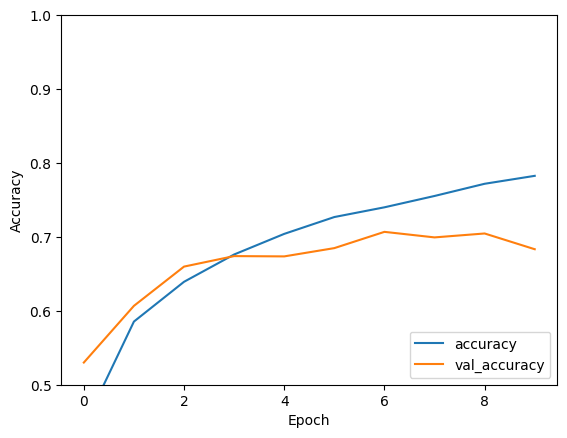

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

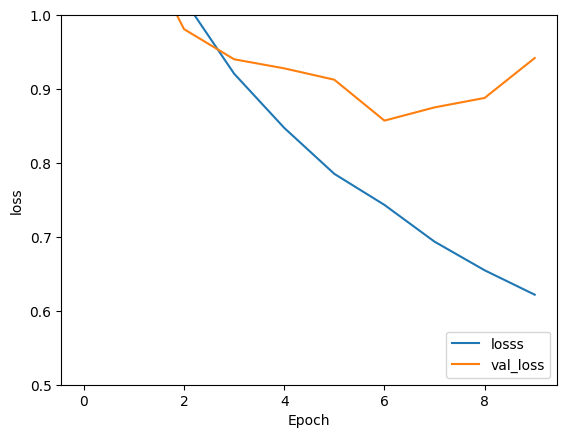

In [30]:
plt.plot(history.history['loss'], label='losss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [31]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 2s - 6ms/step - accuracy: 0.6833 - loss: 0.9420


In [32]:
print(test_acc)

0.6833000183105469


In [33]:
print(test_loss)

0.9419736266136169


Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.